In [39]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/Users/luiscamacho/VSCProjects/Exploracion_Proyecto_Final/data/processed/df_listo_para_eda.csv',sep=';')
df

CUT Comuna Origen Comuna Origen  CUT Provincia Origen  \
0                     1101       Iquique                    11   
1                     1101       Iquique                    11   
2                     1101       Iquique                    11   
3                     1101       Iquique                    11   
4                     1101       Iquique                    11   
...                    ...           ...                   ...   
2952619              16305   San Nicolás                   163   
2952620              16305   San Nicolás                   163   
2952621              16305   San Nicolás                   163   
2952622              16305   San Nicolás                   163   
2952623              16305   San Nicolás                   163   

        Provincia Origen  CUT Region Origen Region Origen  CUT Comuna Destino  \
0                Iquique                  1      Tarapacá                1402   
1                Iquique                  1      Tarapacá                1403   
2                Iquique                  1      Tarapacá                1404   
3                Iquique                  1      Tarapacá                1405   
4                Iquique                  1      Tarapacá                2101   
...                  ...                ...           ...                 ...   
2952619          Punilla                 16         Ñuble               16203   
2952620          Punilla                 16         Ñuble               16207   
2952621          Punilla                 16         Ñuble               16302   
2952622          Punilla                 16         Ñuble               16303   
2952623          Punilla                 16         Ñuble               16304   

        Comuna Destino              Destino Turistico  CUT Provincia Destino  \
0               Camiña                         Camiña                     14   
1             Colchane  Colchane - P.N. Volcán Isluga                     14   
2                Huara          Resto región Tarapacá                     14   
3                 Pica                           Pica                     14   
4          Antofagasta                    Antofagasta                     21   
...                ...                            ...                    ...   
2952619        Coelemu                Valle del Itata                    162   
2952620       Treguaco             Resto región Ñuble                    162   
2952621       Coihueco             Resto región Ñuble                    163   
2952622         Ñiquén             Resto región Ñuble                    163   
2952623     San Fabián                     San Fabián                    163   

        Provincia Destino  CUT Region Destino Region Destino  Anio  CUT Mes  \
0               Tamarugal                   1       Tarapacá  2019        1   
1               Tamarugal                   1       Tarapacá  2019        1   
2               Tamarugal                   1       Tarapacá  2019        1   
3               Tamarugal                   1       Tarapacá  2019        1   
4             Antofagasta                   2    Antofagasta  2019        1   
...                   ...                 ...            ...   ...      ...   
2952619             Itata                  16          Ñuble  2023       12   
2952620             Itata                  16          Ñuble  2023       12   
2952621           Punilla                  16          Ñuble  2023       12   
2952622           Punilla                  16          Ñuble  2023       12   
2952623           Punilla                  16          Ñuble  2023       12   

               Mes  Viajes Ocasionales Temporada  PIB Region Origen  \
0            enero                 109      Alta        1061.580205   
1            enero                 298      Alta        1061.580205   
2            enero                2594      Alta        1061.580205   
3            enero                4138      Alta 

In [14]:
# Verificación de filas duplicadas
print(f'Filas Duplicadas: {df.duplicated().sum()}')

Filas Duplicadas: 0


In [15]:
# Verificación de NaNs
total_nan = df.isnull().sum().sum()
print("Total de NaN en el DataFrame:", total_nan)

Total de NaN en el DataFrame: 0


In [16]:
# Verificación de Nulos
df.isnull().sum().sort_values(ascending=False)

CUT Comuna Origen        0
Comuna Origen            0
PIB Region Origen        0
Temporada                0
Viajes Ocasionales       0
Mes                      0
CUT Mes                  0
Anio                     0
Region Destino           0
CUT Region Destino       0
Provincia Destino        0
CUT Provincia Destino    0
Destino Turistico        0
Comuna Destino           0
CUT Comuna Destino       0
Region Origen            0
CUT Region Origen        0
Provincia Origen         0
CUT Provincia Origen     0
PIB Region Destino       0
dtype: int64

In [17]:
# Factorizar las variables cátegoricas, para poder hacer matriz de correlaciónes 
df['CUT Destino Turistico'] = pd.factorize(df['Destino Turistico'])[0]
df['CUT Temporada'] = df['Temporada'].map({'Alta': 1, 'Baja': 0})

# Ordenar columnas
columnas = [
    'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen', 'Provincia Origen',
    'CUT Region Origen', 'Region Origen', 'CUT Comuna Destino', 'Comuna Destino', 'CUT Destino Turistico',
    'Destino Turistico', 'CUT Provincia Destino', 'Provincia Destino', 'CUT Region Destino',
    'Region Destino', 'Anio', 'CUT Mes', 'Mes', 'Viajes Ocasionales', 'CUT Temporada', 'Temporada',
    'PIB Region Origen', 'PIB Region Destino'
]

df = df[columnas]

df.head()

CUT Comuna Origen Comuna Origen  CUT Provincia Origen Provincia Origen  \
0               1101       Iquique                    11          Iquique   
1               1101       Iquique                    11          Iquique   
2               1101       Iquique                    11          Iquique   
3               1101       Iquique                    11          Iquique   
4               1101       Iquique                    11          Iquique   

   CUT Region Origen Region Origen  CUT Comuna Destino Comuna Destino  \
0                  1      Tarapacá                1402         Camiña   
1                  1      Tarapacá                1403       Colchane   
2                  1      Tarapacá                1404          Huara   
3                  1      Tarapacá                1405           Pica   
4                  1      Tarapacá                2101    Antofagasta   

   CUT Destino Turistico              Destino Turistico  ...  \
0                      0                         Camiña  ...   
1                      1  Colchane - P.N. Volcán Isluga  ...   
2                      2          Resto región Tarapacá  ...   
3                      3                           Pica  ...   
4                      4                    Antofagasta  ...   

   CUT Region Destino Region Destino  Anio CUT Mes    Mes  Viajes Ocasionales  \
0                   1       Tarapacá  2019       1  enero                 109   
1                   1       Tarapacá  2019       1  enero                 298   
2                   1       Tarapacá  2019       1  enero                2594   
3                   1       Tarapacá  2019       1  enero                4138   
4                   2    Antofagasta  2019       1  enero                2071   

  CUT Temporada  Temporada  PIB Region Origen PIB Region Destino  
0             1       Alta        1061.580205        1061.580205  
1             1       Alta        1061.580205        1061.580205  
2             1       Alta        1061.580205        1061.580205  
3             1       Alta        1061.580205        1061.580205  
4             1       Alta        1061.580205        3724.530431  

[5 rows x 22 columns]

In [18]:
# Identificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Columnas categóricas:", categorical_cols)
print("Cantidad de Columnas categóricas: ", len(categorical_cols))
print("Columnas numéricas:", numerical_cols)
print("Cantidad de Columnas numéricas: ", len(numerical_cols))

Columnas categóricas: ['Comuna Origen', 'Provincia Origen', 'Region Origen', 'Comuna Destino', 'Destino Turistico', 'Provincia Destino', 'Region Destino', 'Mes', 'Temporada']
Cantidad de Columnas categóricas:  9
Columnas numéricas: ['CUT Comuna Origen', 'CUT Provincia Origen', 'CUT Region Origen', 'CUT Comuna Destino', 'CUT Destino Turistico', 'CUT Provincia Destino', 'CUT Region Destino', 'Anio', 'CUT Mes', 'Viajes Ocasionales', 'CUT Temporada', 'PIB Region Origen', 'PIB Region Destino']
Cantidad de Columnas numéricas:  13


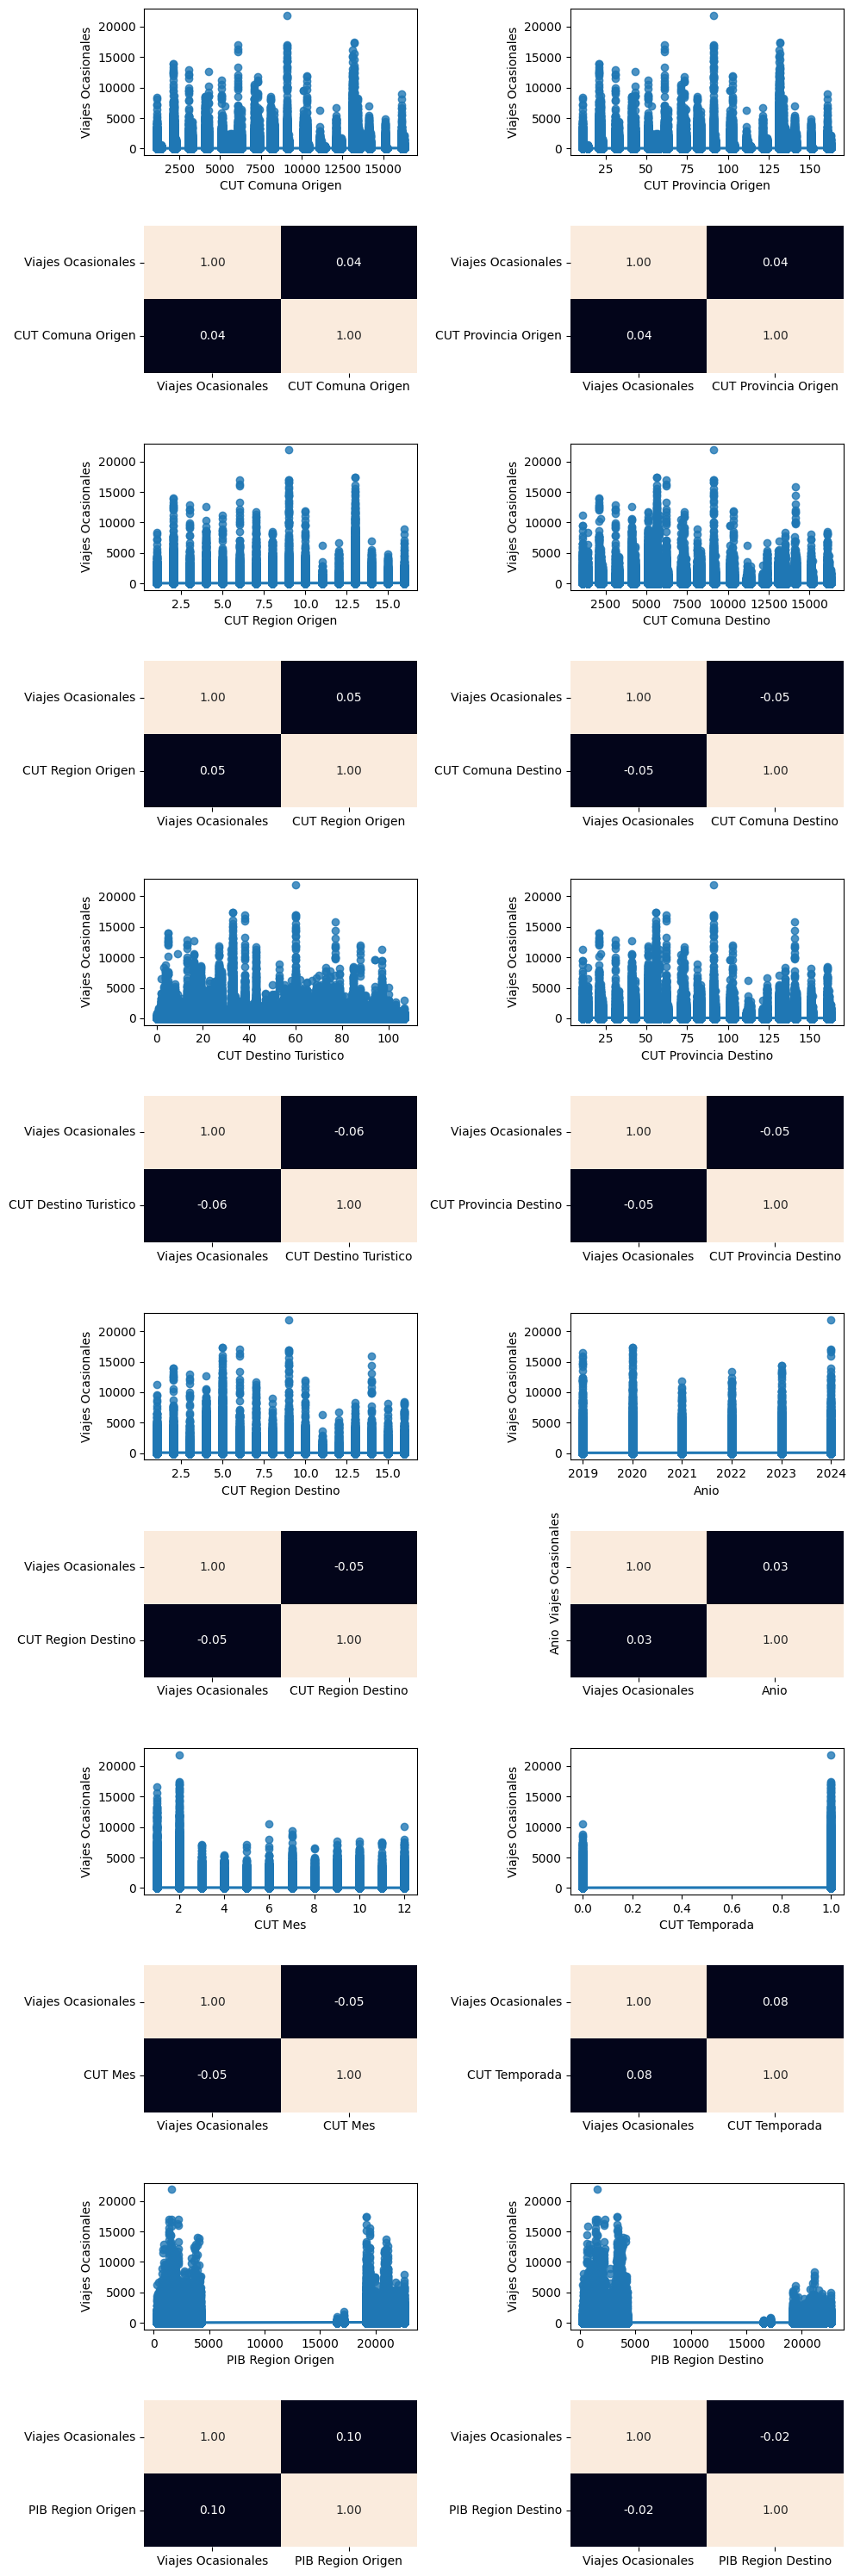

In [19]:
# Analisis Multivariante
    # Anlisis Numerico - numerico

def plot_numerical_vs_target(df, target_var):
    # Verificar que el DataFrame contiene solo variables numéricas
    if not all(df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
        raise ValueError("El DataFrame debe contener solo variables numéricas.")

    # Verificar que la variable objetivo está en el DataFrame
    if target_var not in df.columns:
        raise ValueError(f"La variable objetivo '{target_var}' no se encuentra en el DataFrame.")

    # Obtener las variables numéricas excepto la variable objetivo
    num_vars = df.select_dtypes(include='number').columns
    num_vars = num_vars[num_vars != target_var]  # Excluir la variable objetivo

    # Calcular el número de filas necesarias para el subplot
    n_vars = len(num_vars)
    n_rows = (n_vars + 1) // 2  # Redondear hacia arriba para obtener suficientes filas

    # Crear la figura y los ejes
    fig, axis = plt.subplots(n_rows * 2, 2, figsize=(10, n_rows * 5))

    # Iterar sobre cada variable numérica y crear gráficos
    for i, var in enumerate(num_vars):
        row = i // 2 * 2  # Fila para regplot
        col = i % 2  # Columna para regplot

        # Graficar regplots
        sns.regplot(ax=axis[row, col], data=df, x=var, y=target_var)
        # Graficar heatmap
        sns.heatmap(df[[target_var, var]].corr(), annot=True, fmt='.2f', ax=axis[row + 1, col], cbar=False)

    # Eliminar ejes vacíos si hay un número impar de variables
    if n_vars % 2 != 0:
        fig.delaxes(axis[n_rows * 2 - 1, 1])

    # Ajustar el layout para evitar solapamiento
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# plot_numerical_vs_target(df, 'charges')

plot_numerical_vs_target(df[numerical_cols], 'Viajes Ocasionales')

/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_1276/3074947280.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


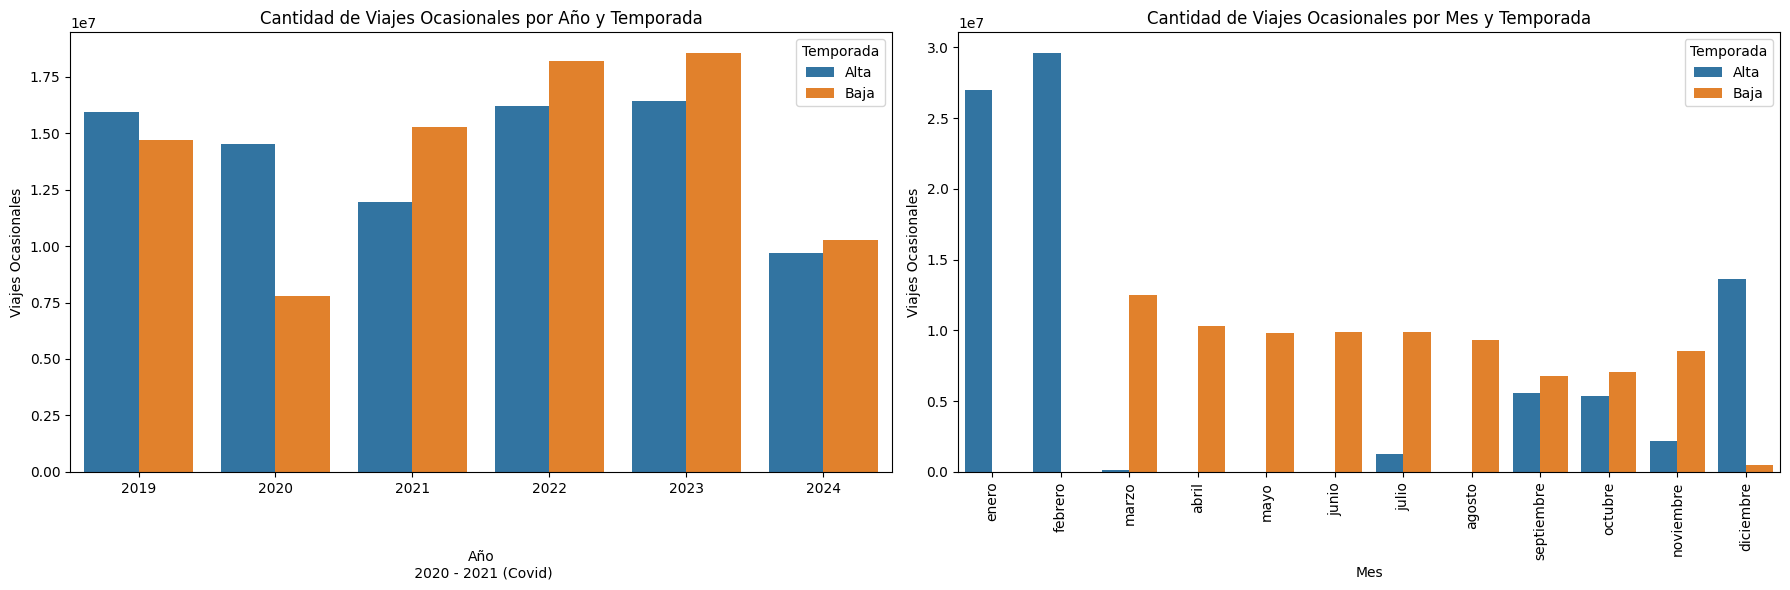

In [20]:
# Análisis Categórico-Categórico

# Creamos la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Viajes Ocasionales por Año y Temporada
viajes_por_anio_temporada = df.groupby(['Anio', 'Temporada'])['Viajes Ocasionales'].sum().reset_index()
sns.barplot(viajes_por_anio_temporada, x='Anio', y='Viajes Ocasionales', hue='Temporada', ax=ax1)
ax1.set_title("Cantidad de Viajes Ocasionales por Año y Temporada")
ax1.set_xlabel('\n\n\nAño\n 2020 - 2021 (Covid)')

# Viajes Ocasionales por Mes y Temporada
viajes_por_mes_temporada = df.groupby(['CUT Mes','Mes', 'Temporada'])['Viajes Ocasionales'].sum().reset_index().sort_values(by='CUT Mes')
sns.barplot(data=viajes_por_mes_temporada, x='Mes', y='Viajes Ocasionales', hue='Temporada', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Cantidad de Viajes Ocasionales por Mes y Temporada")

plt.tight_layout()

plt.show()


In [21]:
# Diccionario de regiones de norte a sur

norte_sur = {
    15: 1,
    1: 2,
    2: 3,
    3: 4,
    4: 5,
    5: 6,
    13: 7,
    6: 8,
    7: 9,
    16: 10,
    8: 11,
    9: 12,
    14: 13,
    10: 14,
    11: 15,
    12: 16
}

# Crear la nueva columna 'Norte a Sur' usando el diccionario
df['Norte a Sur Origen'] = df['CUT Region Origen'].map(norte_sur)
df['Norte a Sur Destino'] = df['CUT Region Destino'].map(norte_sur)

/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_1276/1215304671.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Norte a Sur Origen'] = df['CUT Region Origen'].map(norte_sur)
/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_1276/1215304671.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Norte a Sur Destino'] = df['CUT Region Destino'].map(norte_sur)


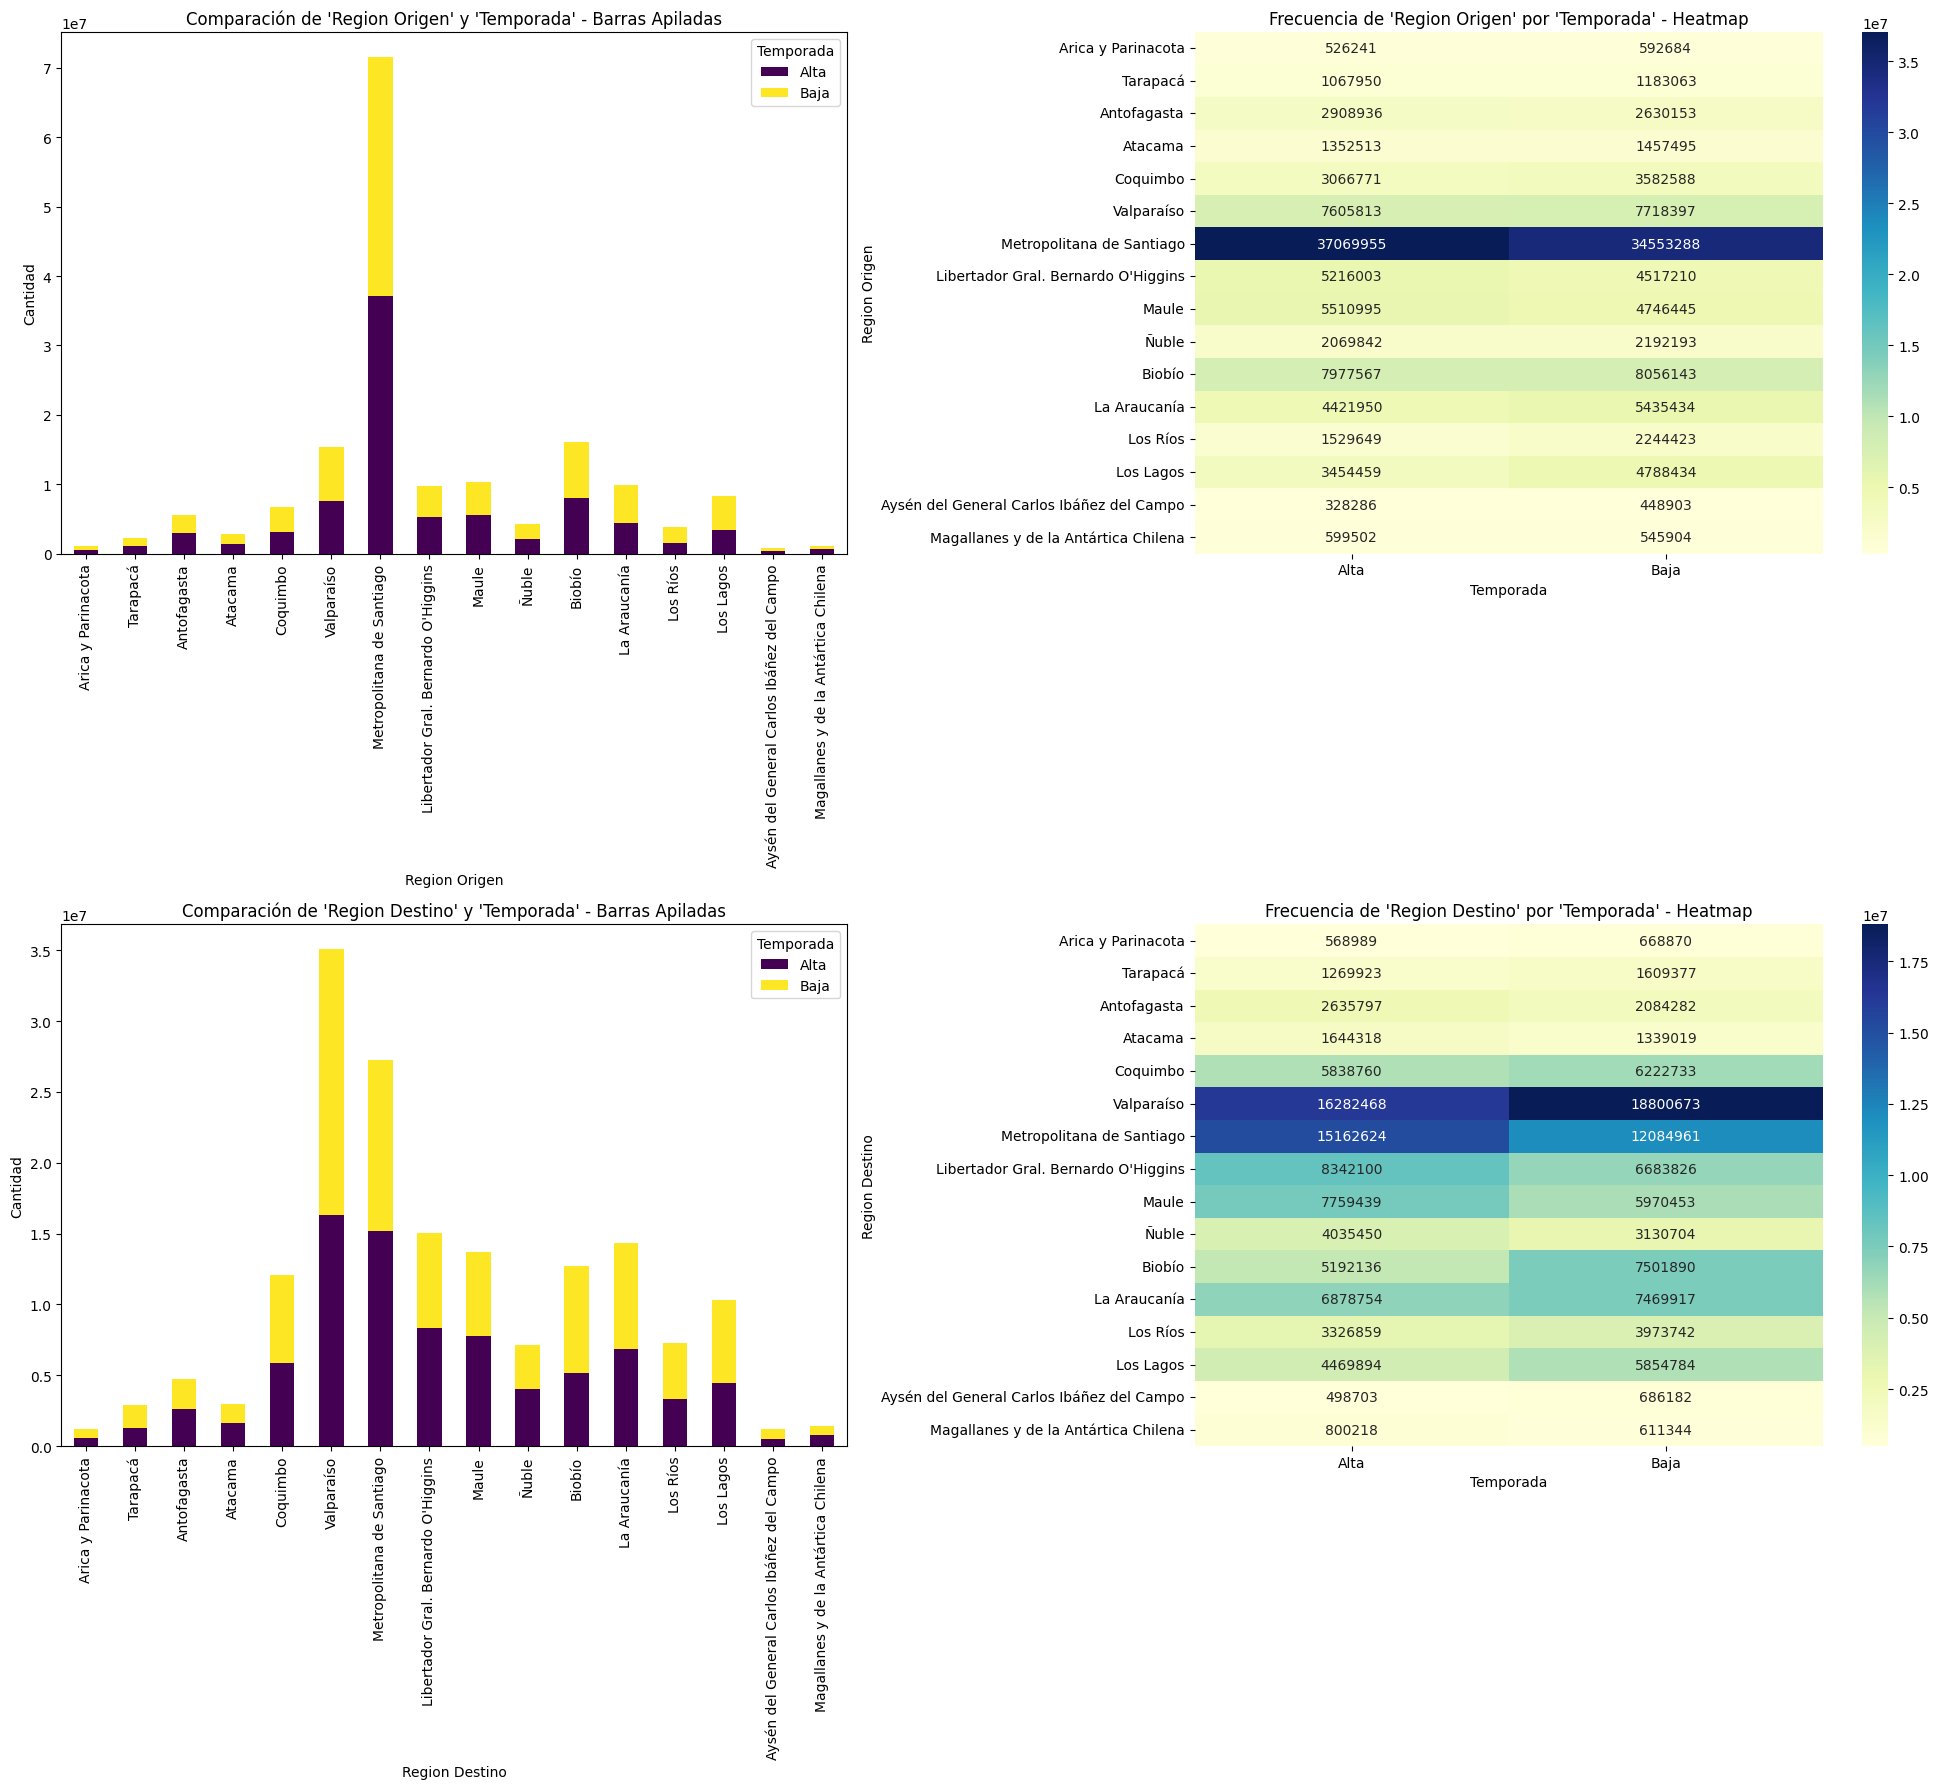

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Región Origen - Temporada
df = df.sort_values(by='Norte a Sur Origen', ascending=True)
orden_regiones = df['Region Origen'].drop_duplicates().tolist()

df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Region Origen', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot = df_pivot.reindex(orden_regiones)
df_pivot.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title("Comparación de 'Region Origen' y 'Temporada' - Barras Apiladas")
axes[0, 0].set_xlabel("Region Origen")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].legend(title="Temporada")

heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Region Origen', columns='Temporada', aggfunc='sum').fillna(0)
heatmap_data = heatmap_data.reindex(orden_regiones)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[0, 1])
axes[0, 1].set_title("Frecuencia de 'Region Origen' por 'Temporada' - Heatmap")
axes[0, 1].set_xlabel("Temporada")
axes[0, 1].set_ylabel("Region Origen")

# Región Destino - Temporada
df = df.sort_values(by='Norte a Sur Destino', ascending=True)
orden_regiones = df['Region Destino'].drop_duplicates().tolist()

df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Region Destino', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot = df_pivot.reindex(orden_regiones)
df_pivot.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title("Comparación de 'Region Destino' y 'Temporada' - Barras Apiladas")
axes[1, 0].set_xlabel("Region Destino")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend(title="Temporada")

heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Region Destino', columns='Temporada', aggfunc='sum').fillna(0)
heatmap_data = heatmap_data.reindex(orden_regiones)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[1, 1])
axes[1, 1].set_title("Frecuencia de 'Region Destino' por 'Temporada' - Heatmap")
axes[1, 1].set_xlabel("Temporada")
axes[1, 1].set_ylabel("Region Destino")

plt.tight_layout()
plt.show()

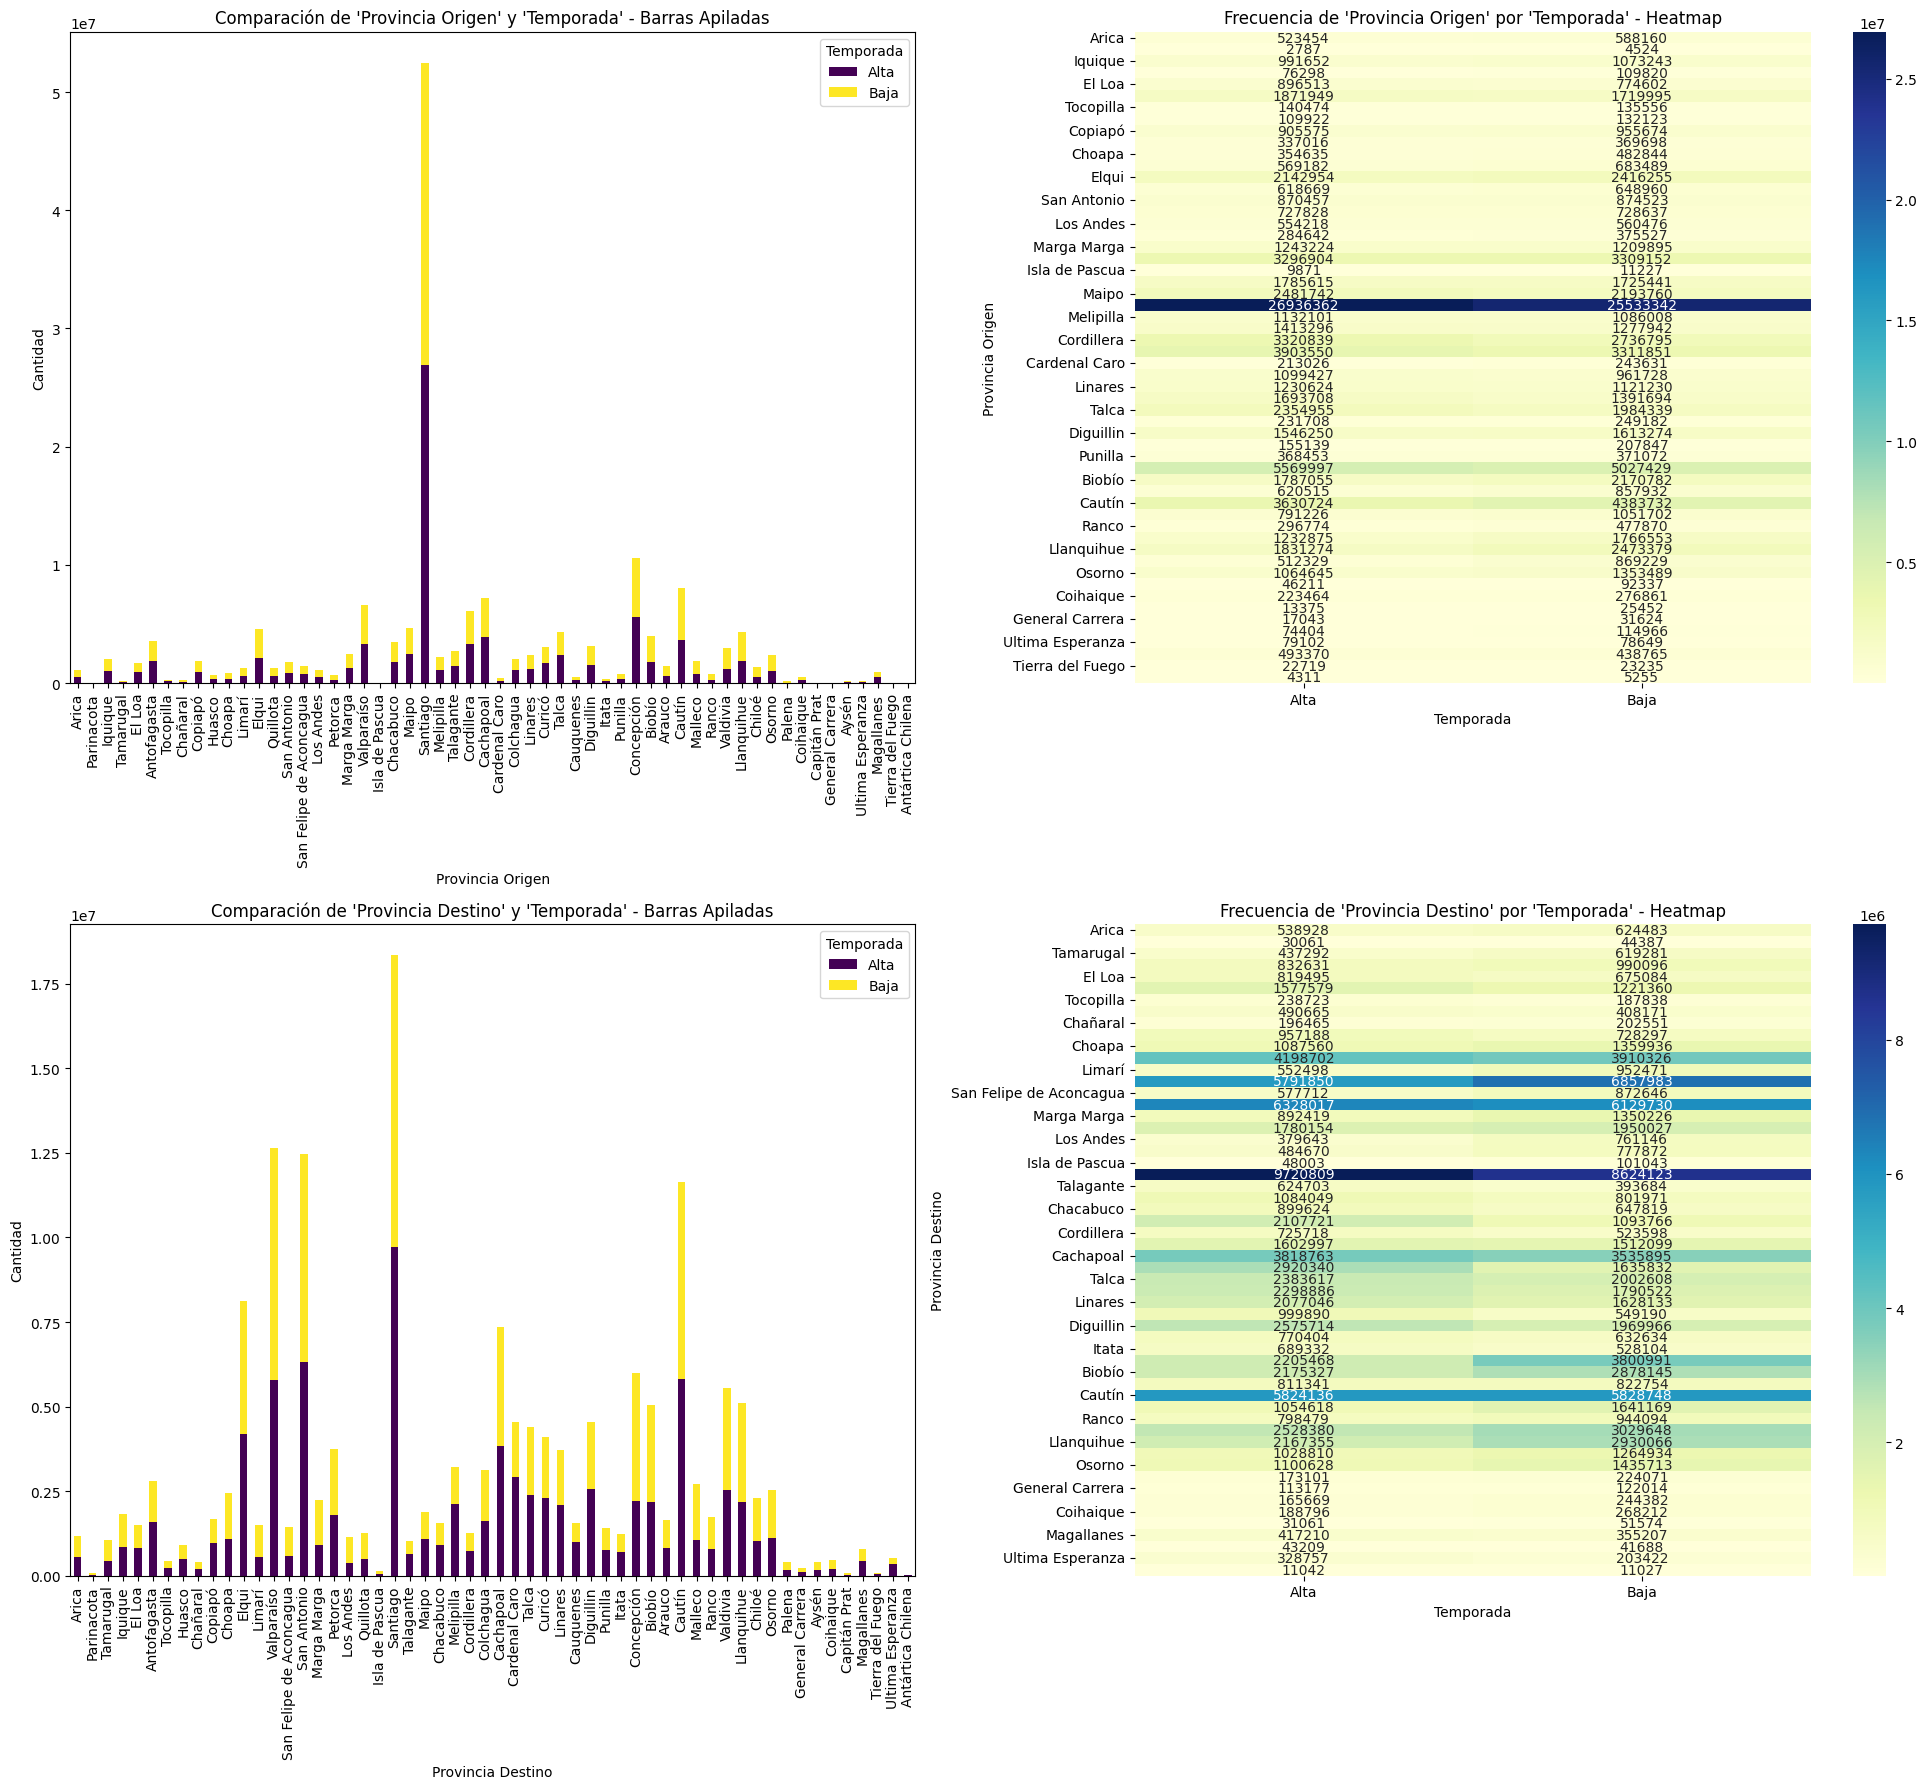

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Provincia Origen - Temporada
df = df.sort_values(by='Norte a Sur Origen', ascending=True)
orden_regiones = df['Provincia Origen'].drop_duplicates().tolist()

df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Provincia Origen', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot = df_pivot.reindex(orden_regiones)
df_pivot.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title("Comparación de 'Provincia Origen' y 'Temporada' - Barras Apiladas")
axes[0, 0].set_xlabel("Provincia Origen")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].legend(title="Temporada")

heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Provincia Origen', columns='Temporada', aggfunc='sum').fillna(0)
heatmap_data = heatmap_data.reindex(orden_regiones)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[0, 1])
axes[0, 1].set_title("Frecuencia de 'Provincia Origen' por 'Temporada' - Heatmap")
axes[0, 1].set_xlabel("Temporada")
axes[0, 1].set_ylabel("Provincia Origen")

# Provincia Destino - Temporada
df = df.sort_values(by='Norte a Sur Destino', ascending=True)
orden_regiones = df['Provincia Destino'].drop_duplicates().tolist()

df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Provincia Destino', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot = df_pivot.reindex(orden_regiones)
df_pivot.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title("Comparación de 'Provincia Destino' y 'Temporada' - Barras Apiladas")
axes[1, 0].set_xlabel("Provincia Destino")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend(title="Temporada")

heatmap_data = df.pivot_table(values='Viajes Ocasionales', index='Provincia Destino', columns='Temporada', aggfunc='sum').fillna(0)
heatmap_data = heatmap_data.reindex(orden_regiones)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".0f", ax=axes[1, 1])
axes[1, 1].set_title("Frecuencia de 'Provincia Destino' por 'Temporada' - Heatmap")
axes[1, 1].set_xlabel("Temporada")
axes[1, 1].set_ylabel("Provincia Destino")

plt.tight_layout()
plt.show()

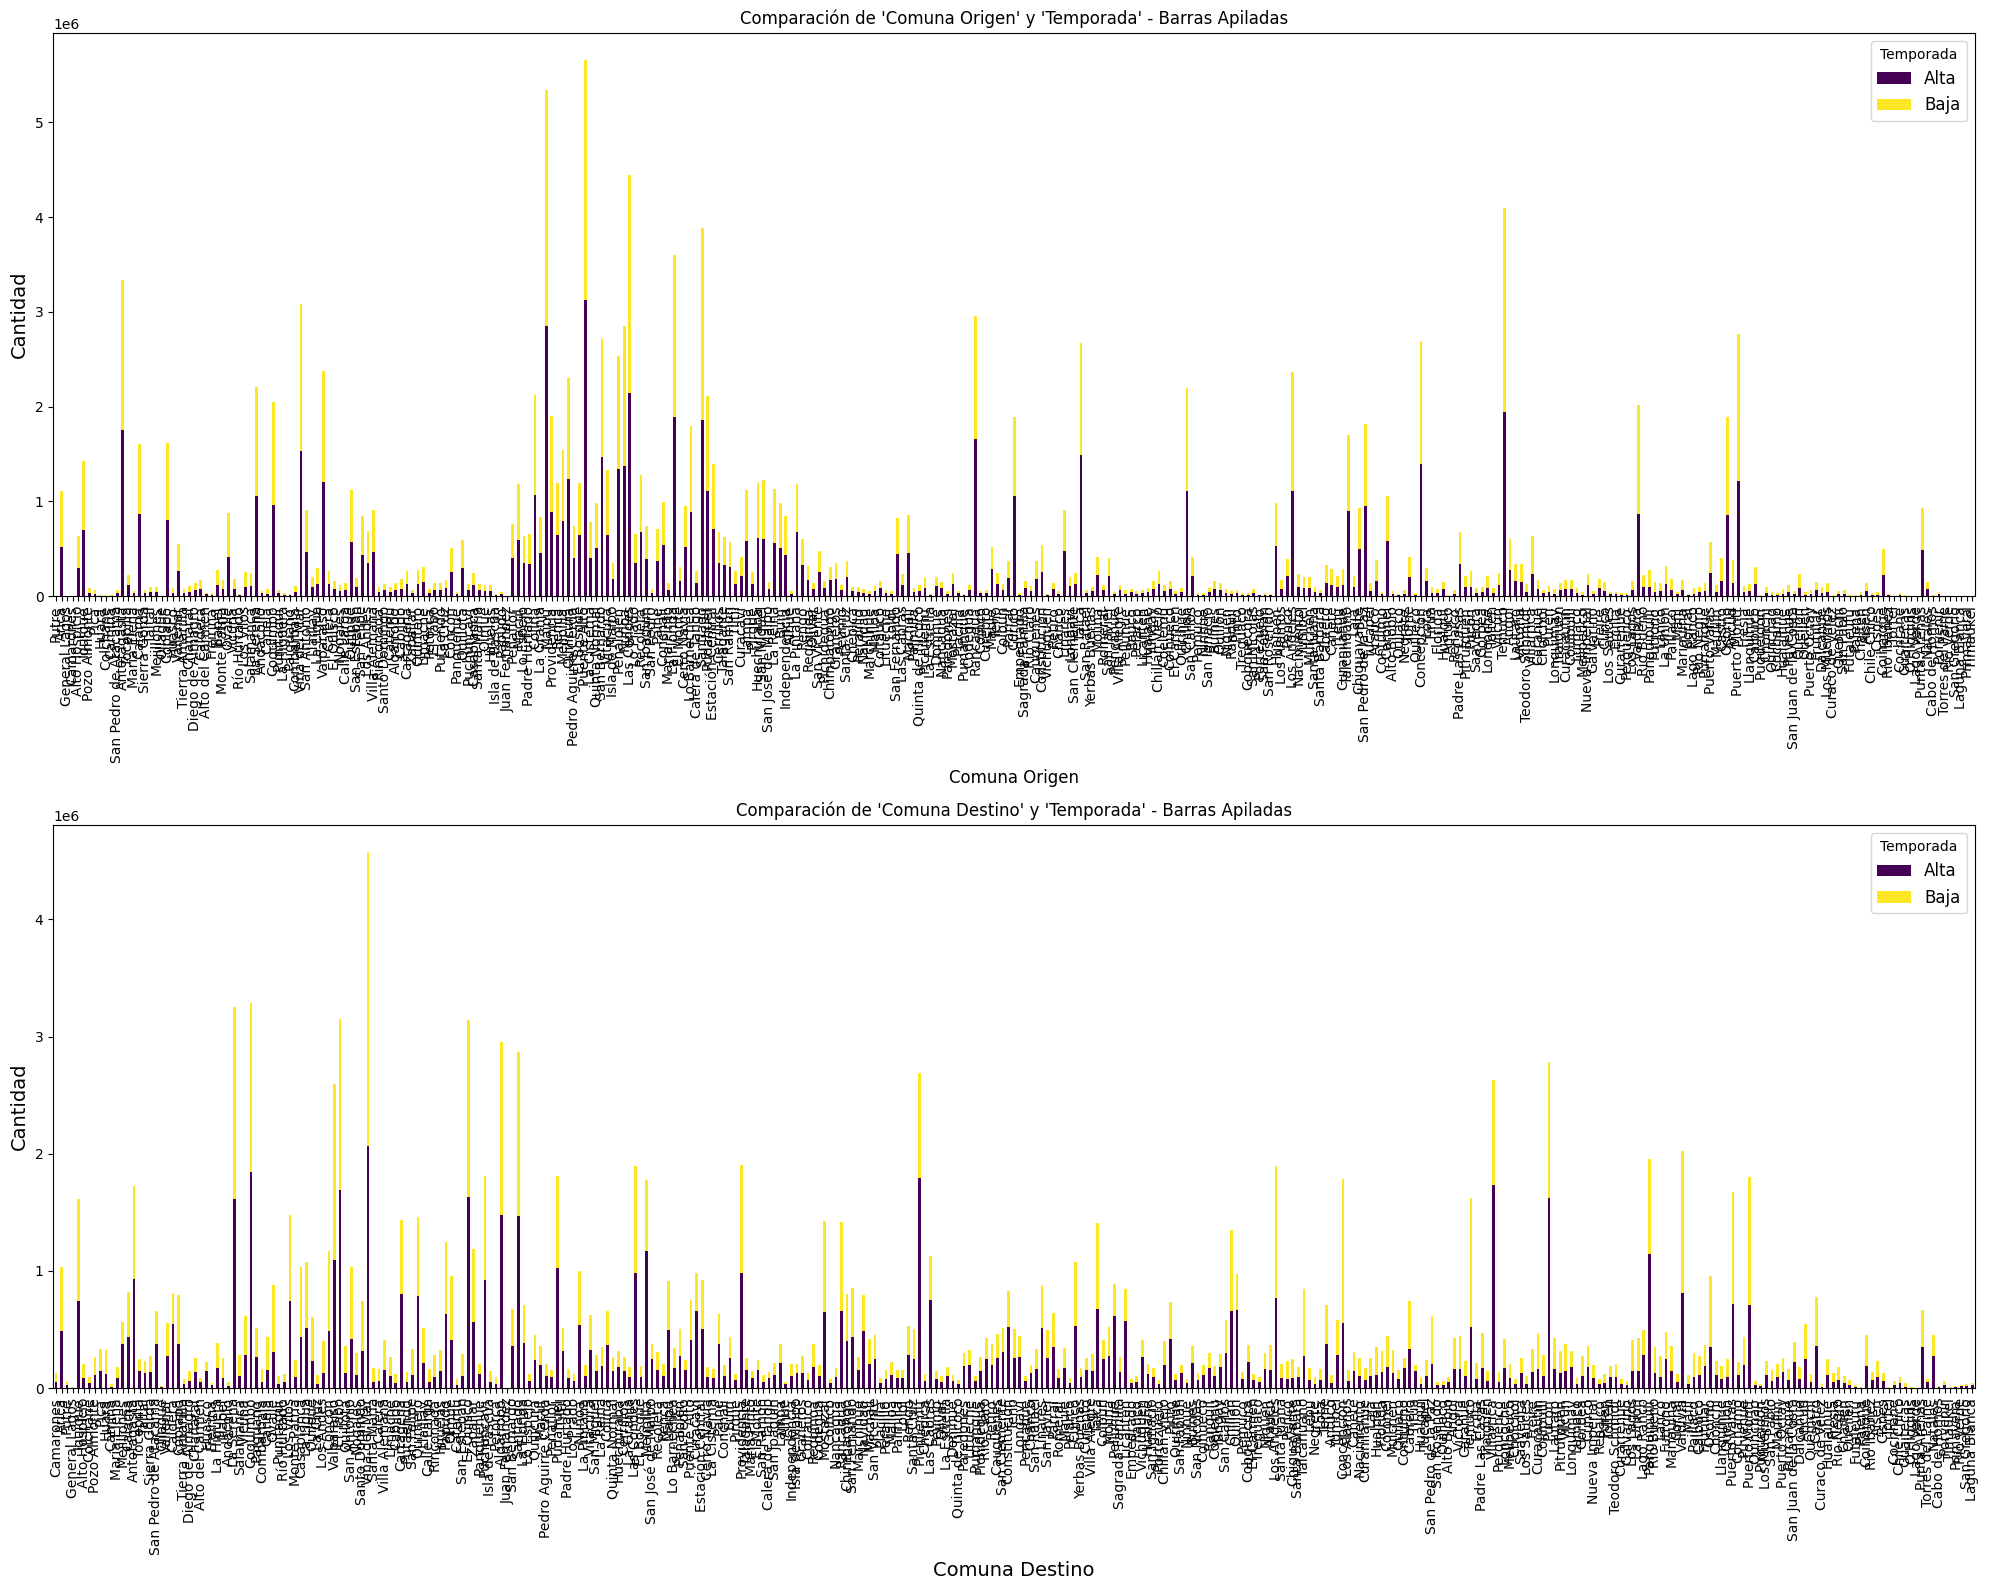

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(20, 16))

# Comuna Origen - Temporada
df = df.sort_values(by='Norte a Sur Origen', ascending=True)
orden_regiones = df['Comuna Origen'].drop_duplicates().tolist()

df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Comuna Origen', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot = df_pivot.reindex(orden_regiones)
df_pivot.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title("Comparación de 'Comuna Origen' y 'Temporada' - Barras Apiladas")
axes[0].set_xlabel('Comuna Origen', fontsize=12) 
axes[0].set_ylabel("Cantidad", fontsize=14)
axes[0].legend(title="Temporada", fontsize=12)

# Comuna Destino - Temporada
df = df.sort_values(by='Norte a Sur Destino', ascending=True)
orden_regiones = df['Comuna Destino'].drop_duplicates().tolist()

df_pivot = df.pivot_table(values='Viajes Ocasionales', index='Comuna Destino', columns='Temporada', aggfunc='sum').fillna(0)
df_pivot = df_pivot.reindex(orden_regiones)
df_pivot.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title("Comparación de 'Comuna Destino' y 'Temporada' - Barras Apiladas")
axes[1].set_xlabel("Comuna Destino", fontsize=14) 
axes[1].set_ylabel("Cantidad", fontsize=14) 
axes[1].legend(title="Temporada", fontsize=12)

plt.tight_layout()
plt.show()


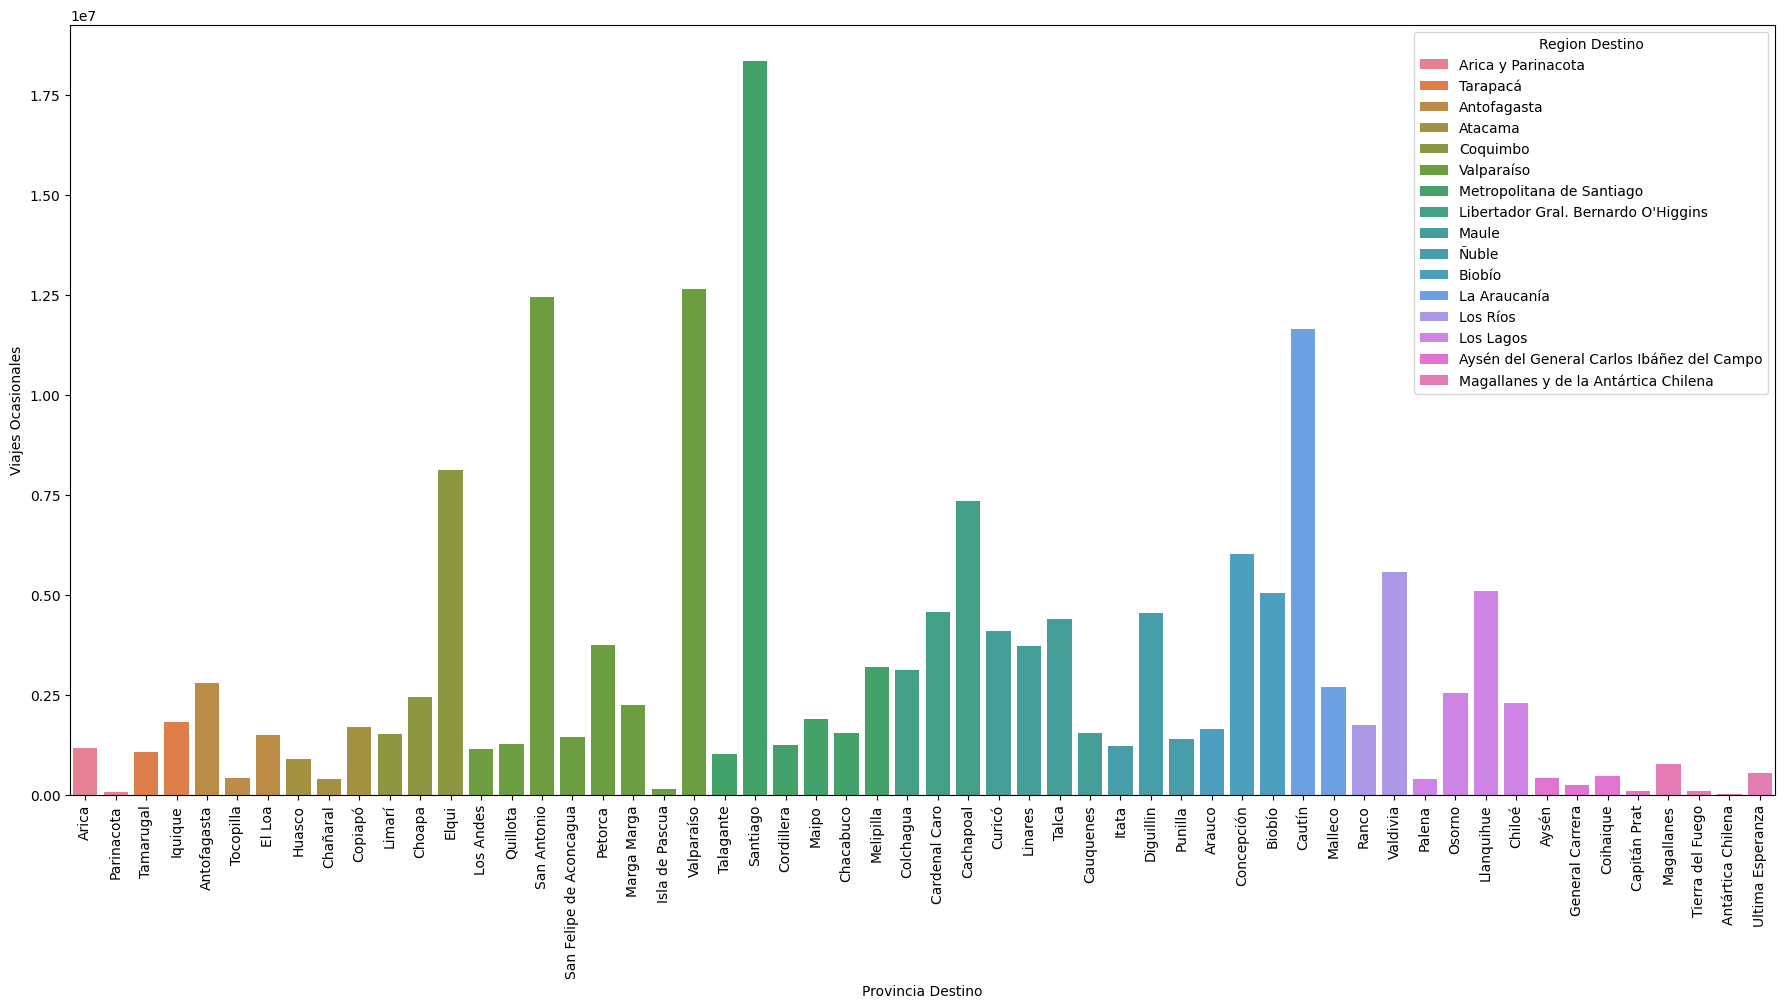

In [25]:
# Viajes Ocasionales por Provincia Destino y Region Destino
df = df.sort_values(by='Norte a Sur Destino',ascending=True)
viajes_por_provincia_region = df.groupby(['Provincia Destino', 'Region Destino','Norte a Sur Destino'])['Viajes Ocasionales'].sum().reset_index()
viajes_por_provincia_region = viajes_por_provincia_region.sort_values(by='Norte a Sur Destino')

plt.figure(figsize=(22, 10))
sns.barplot(data=viajes_por_provincia_region, x='Provincia Destino', y='Viajes Ocasionales', hue='Region Destino',order=viajes_por_provincia_region['Provincia Destino'])
plt.xticks(rotation=90)

plt.show()

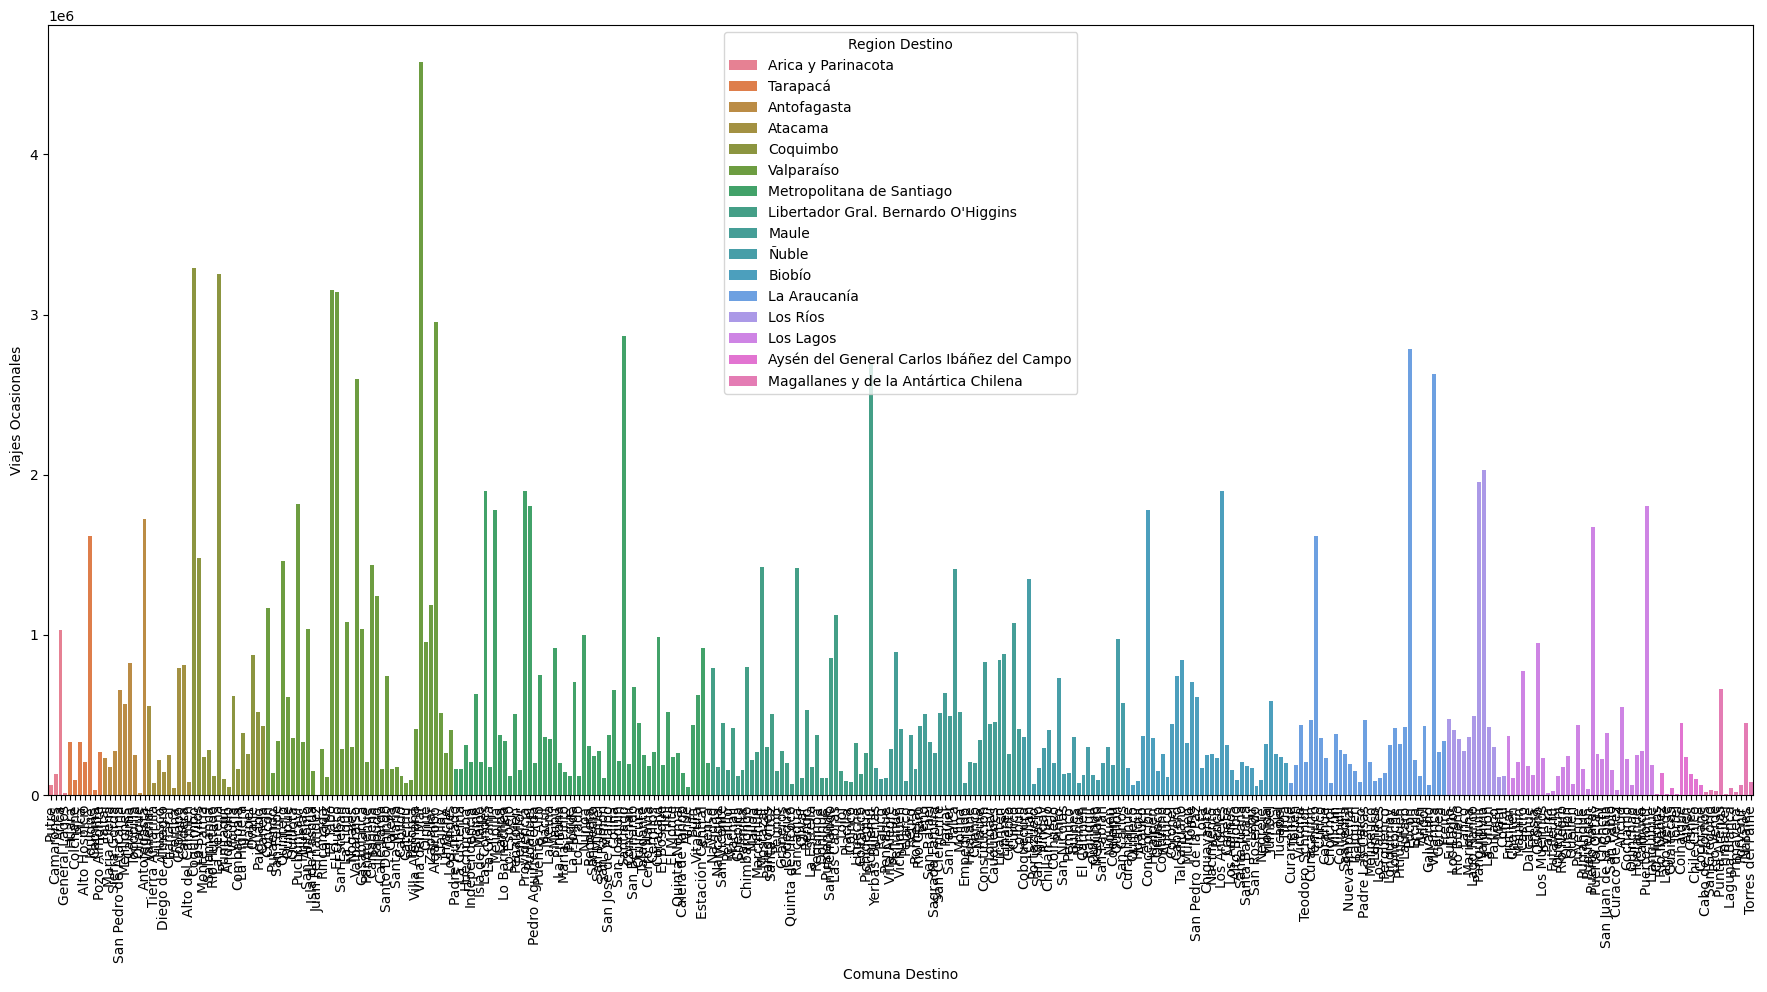

In [26]:
# Viajes Ocasionales por Comuna Destino y Region Destino
viajes_por_comuna_region = df.groupby(['Comuna Destino', 'Region Destino','Norte a Sur Destino'])['Viajes Ocasionales'].sum().reset_index()
viajes_por_comuna_region = viajes_por_comuna_region.sort_values(by='Norte a Sur Destino')

plt.figure(figsize=(22, 10))
sns.barplot(data=viajes_por_comuna_region, x='Comuna Destino', y='Viajes Ocasionales', hue='Region Destino', order=viajes_por_comuna_region['Comuna Destino'])
plt.xticks(rotation=90)


plt.show()

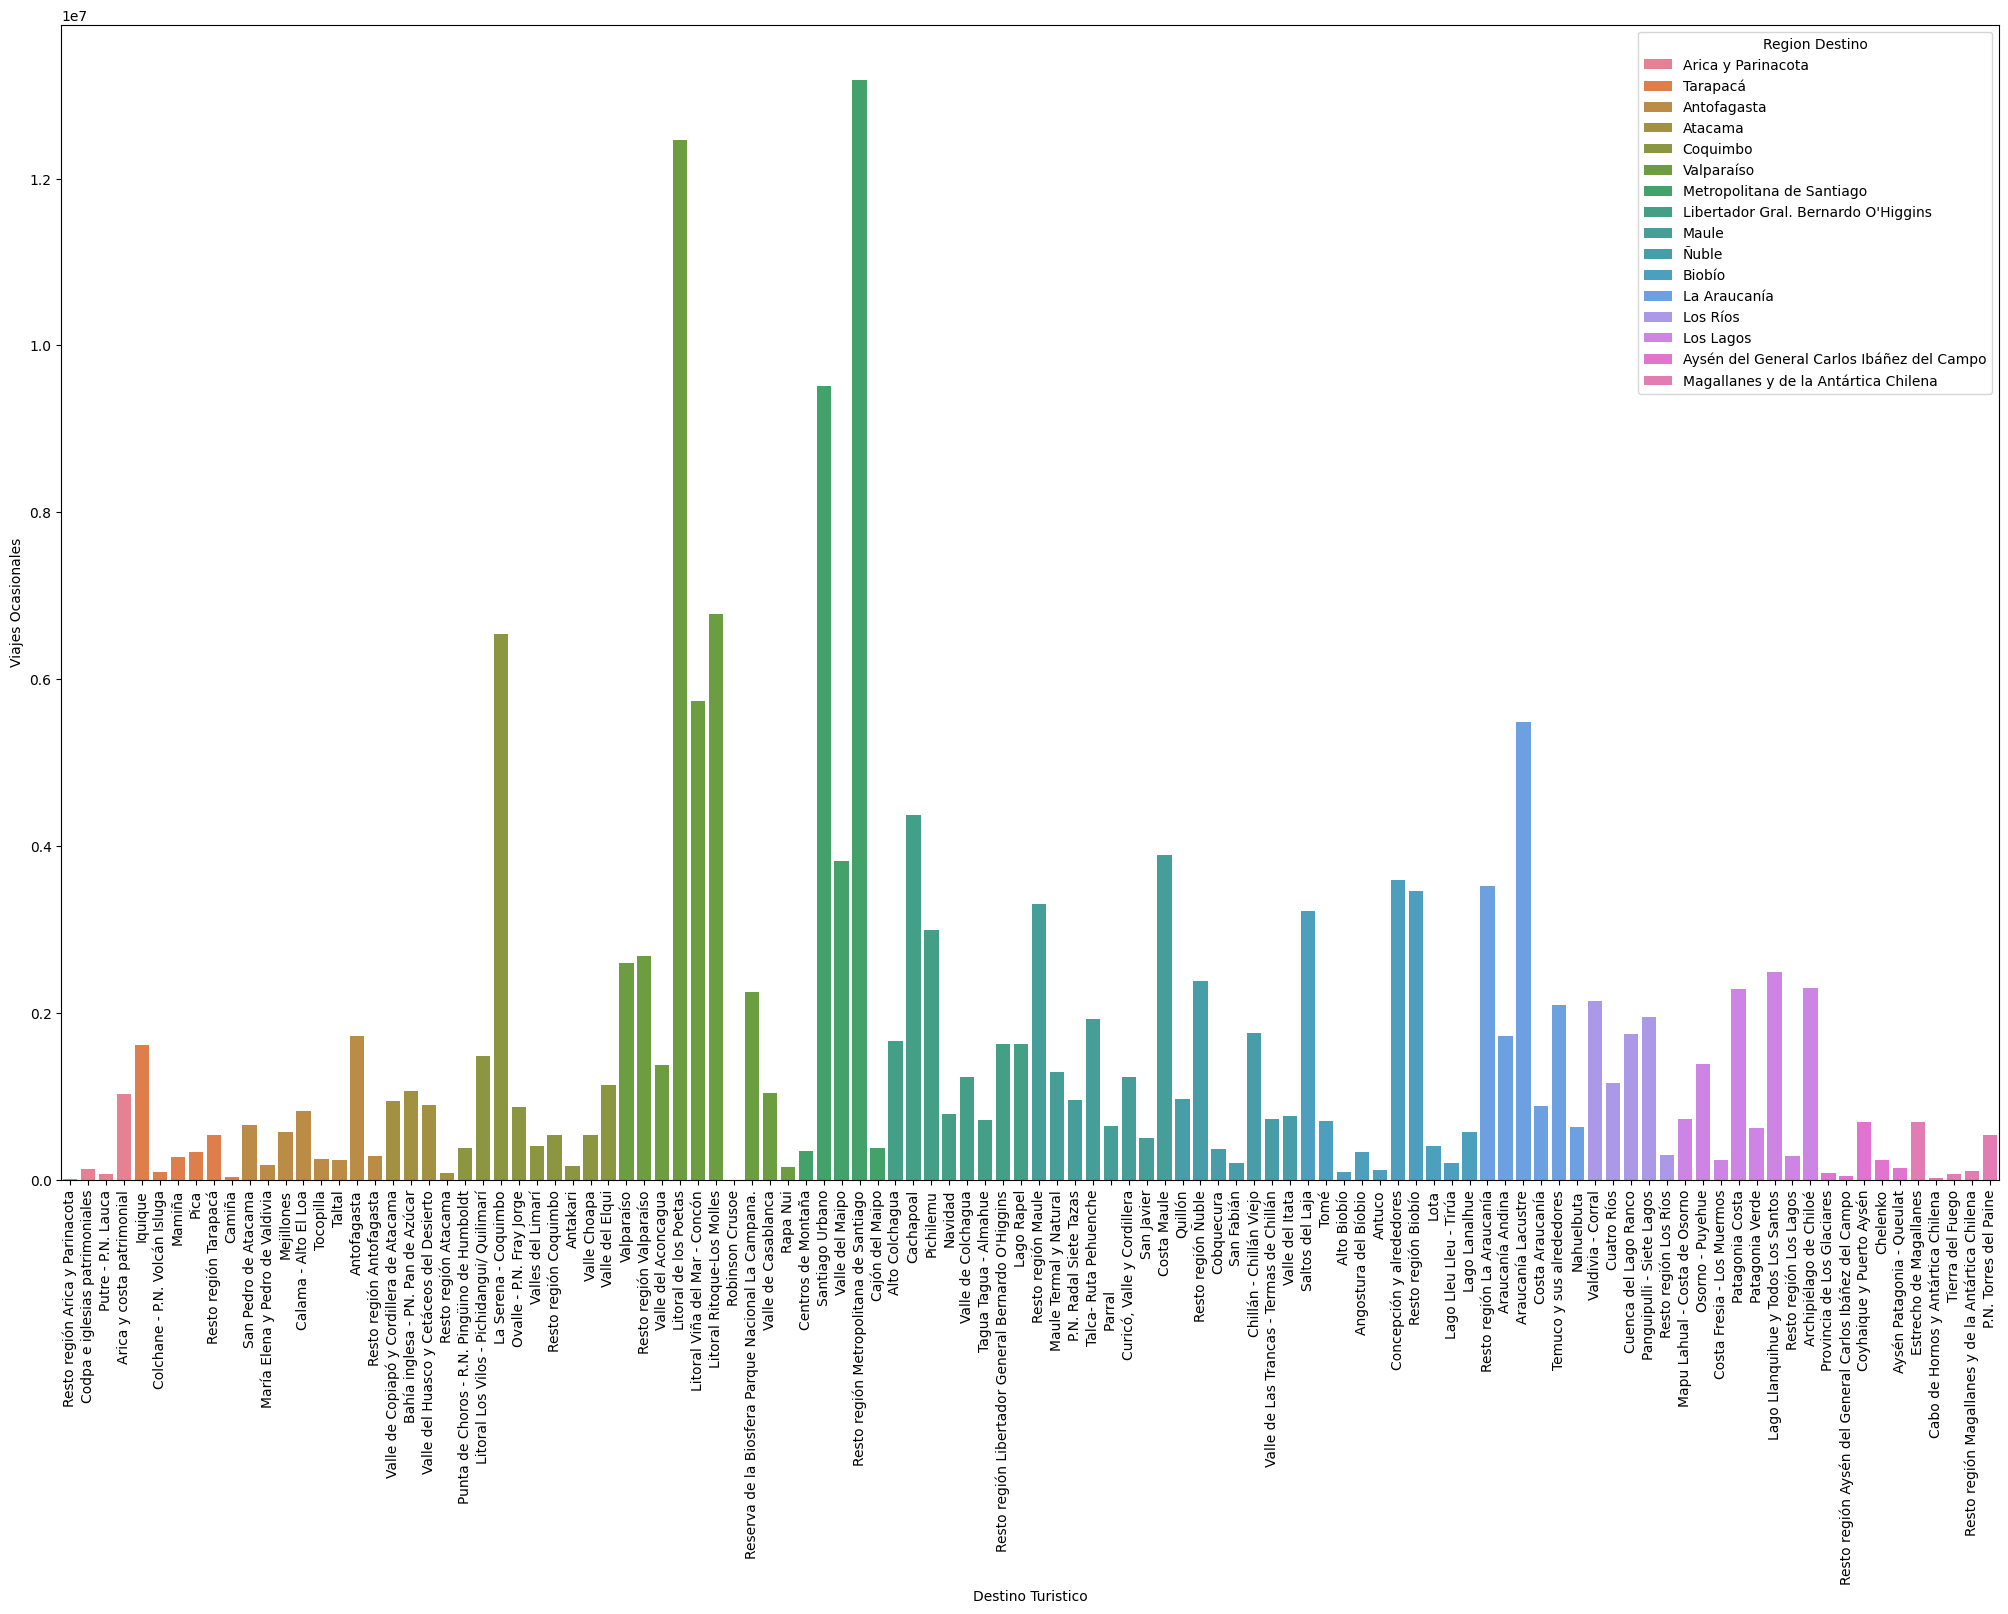

In [27]:
# Viajes Ocasionales por Destino Turistico y Region Destino
df = df.sort_values(by='Norte a Sur Destino',ascending=True)
viajes_por_destino_region = df.groupby(['Destino Turistico', 'Region Destino','Norte a Sur Destino'])['Viajes Ocasionales'].sum().reset_index()
viajes_por_destino_region = viajes_por_destino_region.sort_values(by='Norte a Sur Destino')

plt.figure(figsize=(25, 15))
sns.barplot(data=viajes_por_destino_region, x='Destino Turistico', y='Viajes Ocasionales', hue='Region Destino',order=viajes_por_destino_region['Destino Turistico'])
plt.xticks(rotation=90)

plt.show()

/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_1276/3298030776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Fecha'] = pd.to_datetime(dfp[['Anio', 'CUT Mes']].astype(str).agg('-'.join, axis=1), format='%Y-%m')


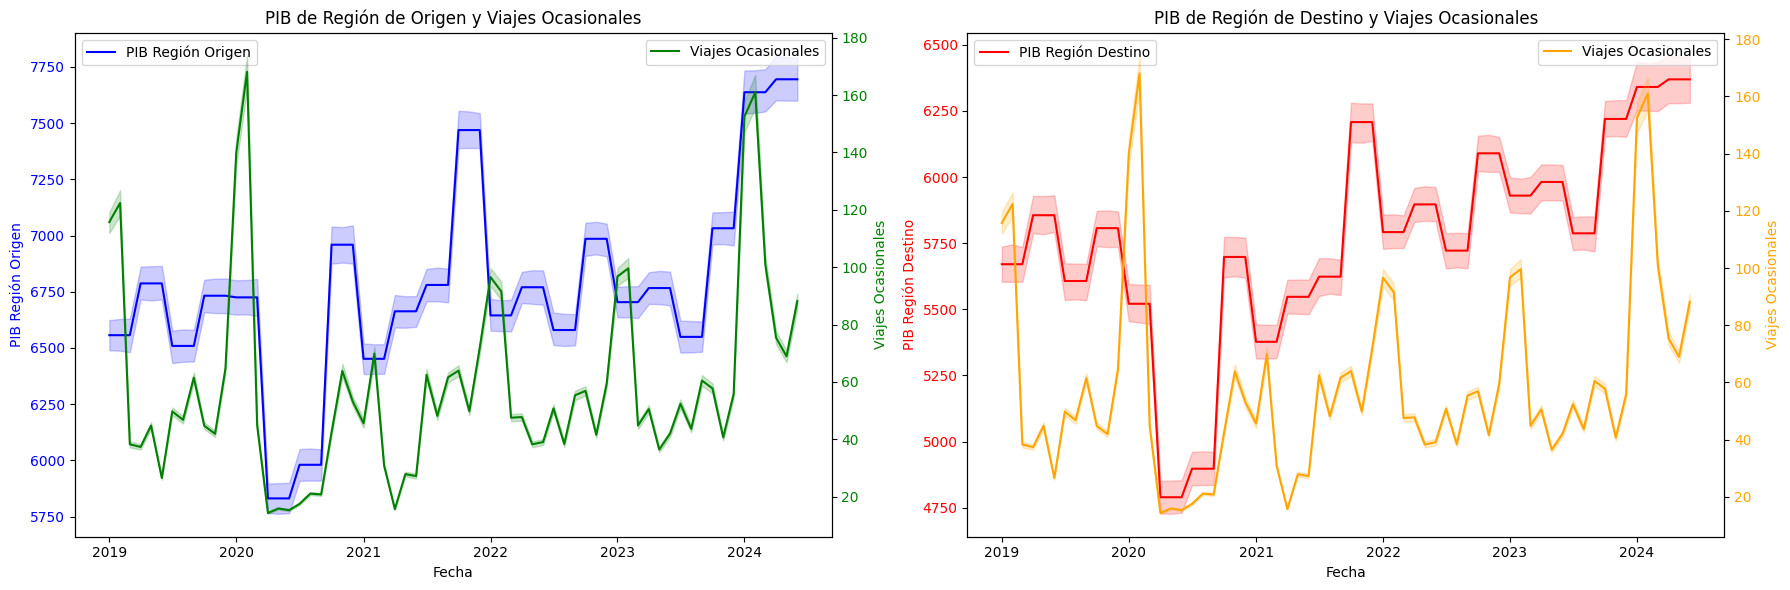

In [28]:
# Comparación de PIB Region Origen y PIB Regions destino con Viajes Ocasionales con respecto al Tiempo

dfp = df[['Anio','CUT Mes','PIB Region Origen', 'PIB Region Destino', 'Viajes Ocasionales']]

# Asegurarnos de que 'Anio' y 'CUT Mes' existan y sean numéricos
dfp['Fecha'] = pd.to_datetime(dfp[['Anio', 'CUT Mes']].astype(str).agg('-'.join, axis=1), format='%Y-%m')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# PIB Región Origen y Viajes Ocasionales (ax1)
sns.lineplot(data=dfp, x='Fecha', y='PIB Region Origen', ax=ax1, color='b', label='PIB Región Origen')
ax1.set_ylabel('PIB Región Origen', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Segundo eje Y para los Viajes Ocasionales 
ax2_1 = ax1.twinx()
sns.lineplot(data=dfp, x='Fecha', y='Viajes Ocasionales', ax=ax2_1, color='g', label='Viajes Ocasionales')
ax2_1.set_ylabel('Viajes Ocasionales', color='g')
ax2_1.tick_params(axis='y', labelcolor='g')

ax1.set_title("PIB de Región de Origen y Viajes Ocasionales")
ax1.set_xlabel('Fecha')

# PIB Región Destino y Viajes Ocasionales en el segundo subplot (ax2)
sns.lineplot(data=dfp, x='Fecha', y='PIB Region Destino', ax=ax2, color='r', label='PIB Región Destino')
ax2.set_ylabel('PIB Región Destino', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Segundo eje Y para los Viajes Ocasionales
ax2_2 = ax2.twinx()
sns.lineplot(data=dfp, x='Fecha', y='Viajes Ocasionales', ax=ax2_2, color='orange', label='Viajes Ocasionales')
ax2_2.set_ylabel('Viajes Ocasionales', color='orange')
ax2_2.tick_params(axis='y', labelcolor='orange')

ax2.set_title("PIB de Región de Destino y Viajes Ocasionales")
ax2.set_xlabel('Fecha')

plt.tight_layout()

plt.show()


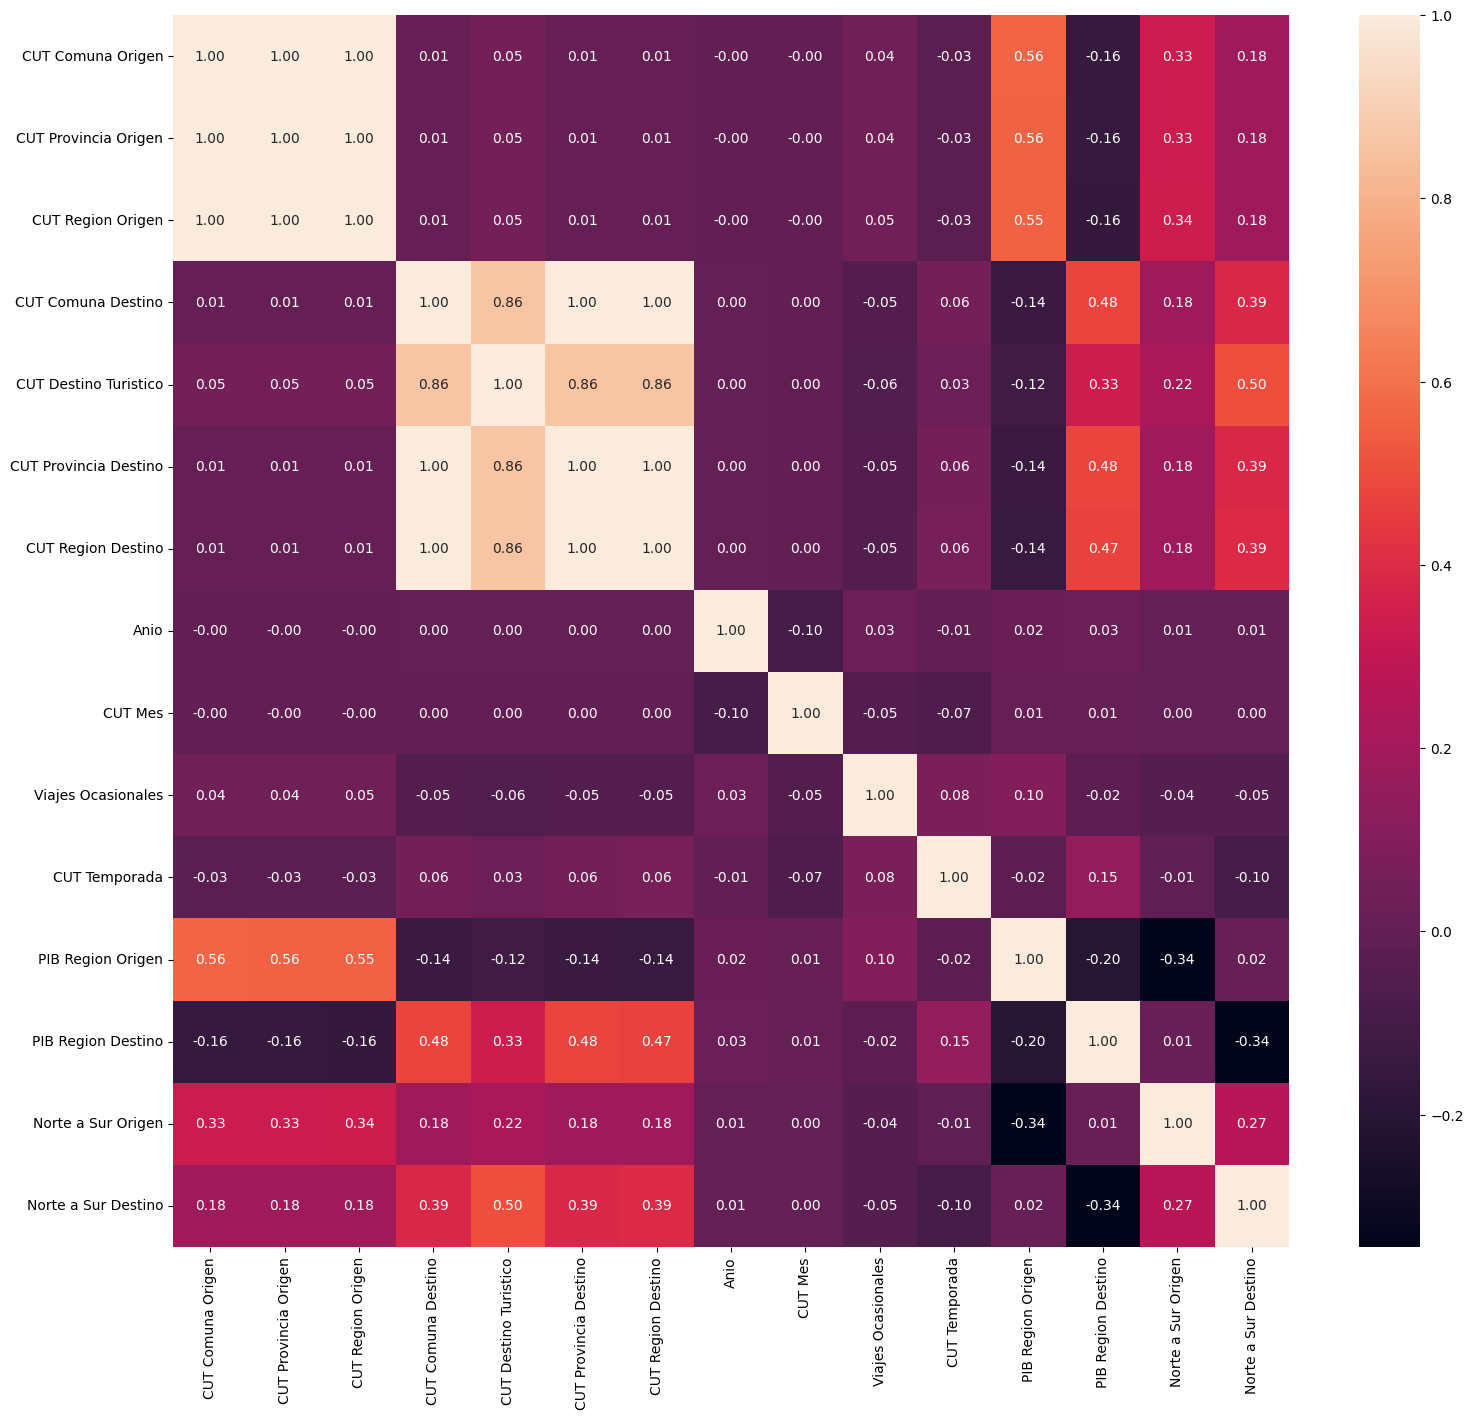

In [29]:
# Análisis de Correlaciones de todas las variables

df_corr= df.drop(['Comuna Origen', 'Provincia Origen', 'Region Origen', 'Comuna Destino', 'Destino Turistico', 'Provincia Destino', 'Region Destino', 'Mes', 'Temporada'],axis=1)
df_corr

plt.figure(figsize=(18, 16))
sns.heatmap(df_corr.corr(),annot=True,fmt=".2f")
plt.show()

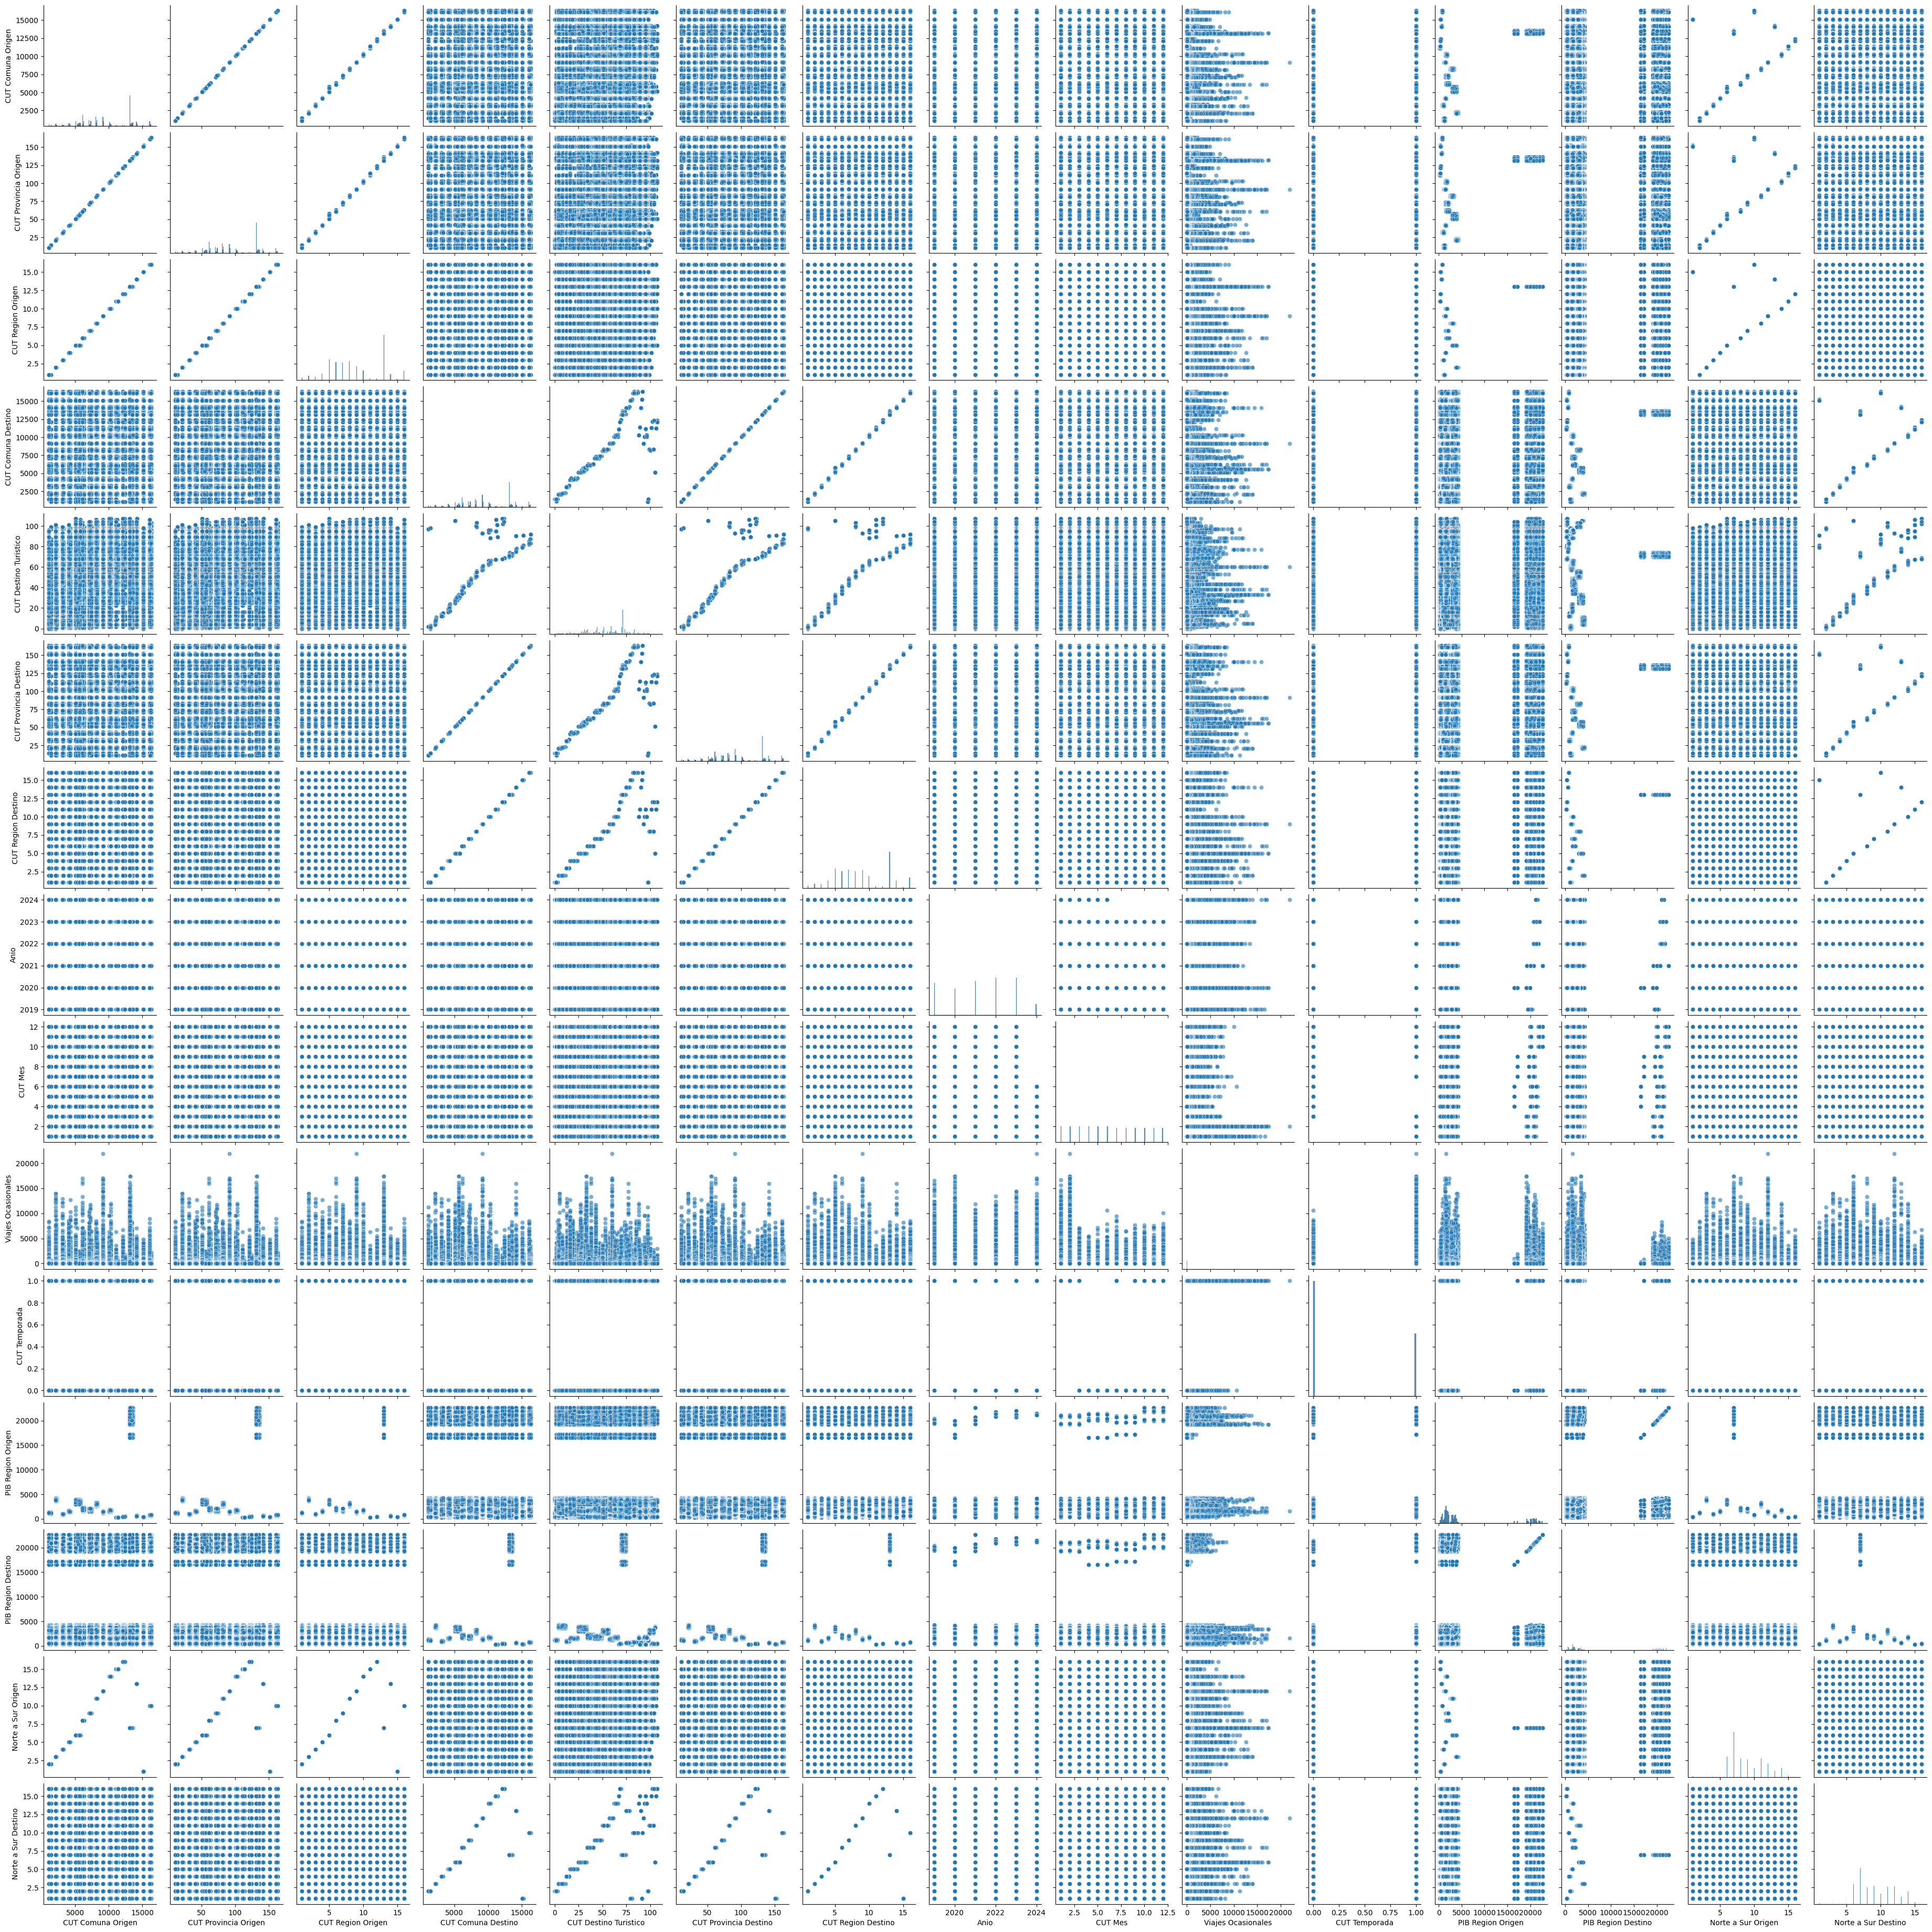

In [30]:
# Comparativa de todas las variables del DataFrame

sns.pairplot(df_corr, kind='scatter', plot_kws={'alpha': 0.6})
plt.show()

In [31]:
df.columns

Index(['CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen',
       'Provincia Origen', 'CUT Region Origen', 'Region Origen',
       'CUT Comuna Destino', 'Comuna Destino', 'CUT Destino Turistico',
       'Destino Turistico', 'CUT Provincia Destino', 'Provincia Destino',
       'CUT Region Destino', 'Region Destino', 'Anio', 'CUT Mes', 'Mes',
       'Viajes Ocasionales', 'CUT Temporada', 'Temporada', 'PIB Region Origen',
       'PIB Region Destino', 'Norte a Sur Origen', 'Norte a Sur Destino'],
      dtype='object')

In [32]:
# Elimina las columnas 'Destino Turístico' y 'CUT Destino Turístico'
df_prueba = df.drop(columns=['Destino Turistico', 'CUT Destino Turistico'])

# Agrupa el DataFrame por las columnas de origen y destino, además del año y mes
df_prueba = df_prueba.groupby(['CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen', 
                 'Provincia Origen', 'CUT Region Origen', 'Region Origen',
                 'CUT Comuna Destino', 'Comuna Destino', 'CUT Provincia Destino', 
                 'Provincia Destino', 'CUT Region Destino', 'Region Destino', 
                 'Anio', 'CUT Mes', 'Mes', 'CUT Temporada', 'Temporada', 
                 'PIB Region Origen', 'PIB Region Destino', 'Norte a Sur Origen', 'Norte a Sur Destino'], as_index=False).sum()
df_prueba

CUT Comuna Origen Comuna Origen  CUT Provincia Origen  \
0                     1101       Iquique                    11   
1                     1101       Iquique                    11   
2                     1101       Iquique                    11   
3                     1101       Iquique                    11   
4                     1101       Iquique                    11   
...                    ...           ...                   ...   
2952619              16305   San Nicolás                   163   
2952620              16305   San Nicolás                   163   
2952621              16305   San Nicolás                   163   
2952622              16305   San Nicolás                   163   
2952623              16305   San Nicolás                   163   

        Provincia Origen  CUT Region Origen Region Origen  CUT Comuna Destino  \
0                Iquique                  1      Tarapacá                1402   
1                Iquique                  1      Tarapacá                1402   
2                Iquique                  1      Tarapacá                1402   
3                Iquique                  1      Tarapacá                1402   
4                Iquique                  1      Tarapacá                1402   
...                  ...                ...           ...                 ...   
2952619          Punilla                 16         Ñuble               16304   
2952620          Punilla                 16         Ñuble               16304   
2952621          Punilla                 16         Ñuble               16304   
2952622          Punilla                 16         Ñuble               16304   
2952623          Punilla                 16         Ñuble               16304   

        Comuna Destino  CUT Provincia Destino Provincia Destino  ...  Anio  \
0               Camiña                     14         Tamarugal  ...  2019   
1               Camiña                     14         Tamarugal  ...  2019   
2               Camiña                     14         Tamarugal  ...  2019   
3               Camiña                     14         Tamarugal  ...  2019   
4               Camiña                     14         Tamarugal  ...  2019   
...                ...                    ...               ...  ...   ...   
2952619     San Fabián                    163           Punilla  ...  2023   
2952620     San Fabián                    163           Punilla  ...  2023   
2952621     San Fabián                    163           Punilla  ...  2023   
2952622     San Fabián                    163           Punilla  ...  2023   
2952623     San Fabián                    163           Punilla  ...  2023   

        CUT Mes         Mes  CUT Temporada Temporada  PIB Region Origen  \
0             1       enero              1      Alta        1061.580205   
1             2     febrero              1      Alta        1061.580205   
2             3       marzo              0      Baja        1061.580205   
3             4       abril              0      Baja        1115.801838   
4             5        mayo              0      Baja        1115.801838   
...         ...         ...            ...       ...                ...   
2952619       8      agosto              0      Baja         737.064697   
2952620       9  septiembre              1      Alta         737.064697   
2952621      10     octubre              0      Baja         833.567298   
2952622      11   noviembre              0      Baja         833.567298   
2952623      12   diciembre              1      Alta         833.567298   

        PIB Region Destino  Norte a Sur Origen  Norte a Sur Destino  \
0              1061.580205                   2                    2   
1              1061.580205                   2                    2   
2              1061.580205                   2                    2   
3              1115.801838                   2                    2   
4              1115.801838                   2    

In [33]:
# Ingeniría de Características

df.describe()

CUT Comuna Origen  CUT Provincia Origen  CUT Region Origen  \
count       2.952624e+06          2.952624e+06       2.952624e+06   
mean        9.252812e+03          9.246212e+01       9.026856e+00   
std         3.774158e+03          3.772225e+01       3.802146e+00   
min         1.101000e+03          1.100000e+01       1.000000e+00   
25%         6.113000e+03          6.100000e+01       6.000000e+00   
50%         8.307000e+03          8.300000e+01       8.000000e+00   
75%         1.311800e+04          1.310000e+02       1.300000e+01   
max         1.630500e+04          1.630000e+02       1.600000e+01   

       CUT Comuna Destino  CUT Destino Turistico  CUT Provincia Destino  \
count        2.952624e+06           2.952624e+06           2.952624e+06   
mean         9.194516e+03           5.411677e+01           9.188172e+01   
std          3.765241e+03           2.164901e+01           3.763625e+01   
min          1.101000e+03           0.000000e+00           1.100000e+01   
25%          6.115000e+03           3.500000e+01           6.100000e+01   
50%          8.314000e+03           5.800000e+01           8.300000e+01   
75%          1.311400e+04           7.100000e+01           1.310000e+02   
max          1.630500e+04           1.070000e+02           1.630000e+02   

       CUT Region Destino          Anio       CUT Mes  Viajes Ocasionales  \
count        2.952624e+06  2.952624e+06  2.952624e+06        2.952624e+06   
mean         8.970835e+00  2.021311e+03  6.312101e+00        5.737242e+01   
std          3.795342e+00  1.541107e+00  3.446936e+00        2.221494e+02   
min          1.000000e+00  2.019000e+03  1.000000e+00        1.000000e+00   
25%          6.000000e+00  2.020000e+03  3.000000e+00        6.000000e+00   
50%          8.000000e+00  2.021000e+03  6.000000e+00        1.300000e+01   
75%          1.300000e+01  2.023000e+03  9.000000e+00        3.700000e+01   
max          1.600000e+01  2.024000e+03  1.200000e+01        2.185900e+04   

       CUT Temporada  PIB Region Origen  PIB Region Destino  \
count   2.952624e+06       2.952624e+06        2.952624e+06   
mean    3.509397e-01       6.752792e+03        5.770869e+03   
std     4.772642e-01       8.051928e+03        7.519412e+03   
min     0.000000e+00       2.697575e+02        2.697575e+02   
25%     0.000000e+00       1.567639e+03        1.485615e+03   
50%     0.000000e+00       2.312617e+03        2.011499e+03   
75%     1.000000e+00       1.651618e+04        3.718329e+03   
max     1.000000e+00       2.261309e+04        2.261309e+04   

       Norte a Sur Origen  Norte a Sur Destino  
count        2.952624e+06         2.952624e+06  
mean         8.532497e+00         8.822865e+00  
std          2.917223e+00         3.071557e+00  
min          1.000000e+00         1.000000e+00  
25%          7.000000e+00         7.000000e+00  
50%          8.000000e+00         8.000000e+00  
75%          1.100000e+01         1.100000e+01  
max          1.600000e+01         1.600000e+01

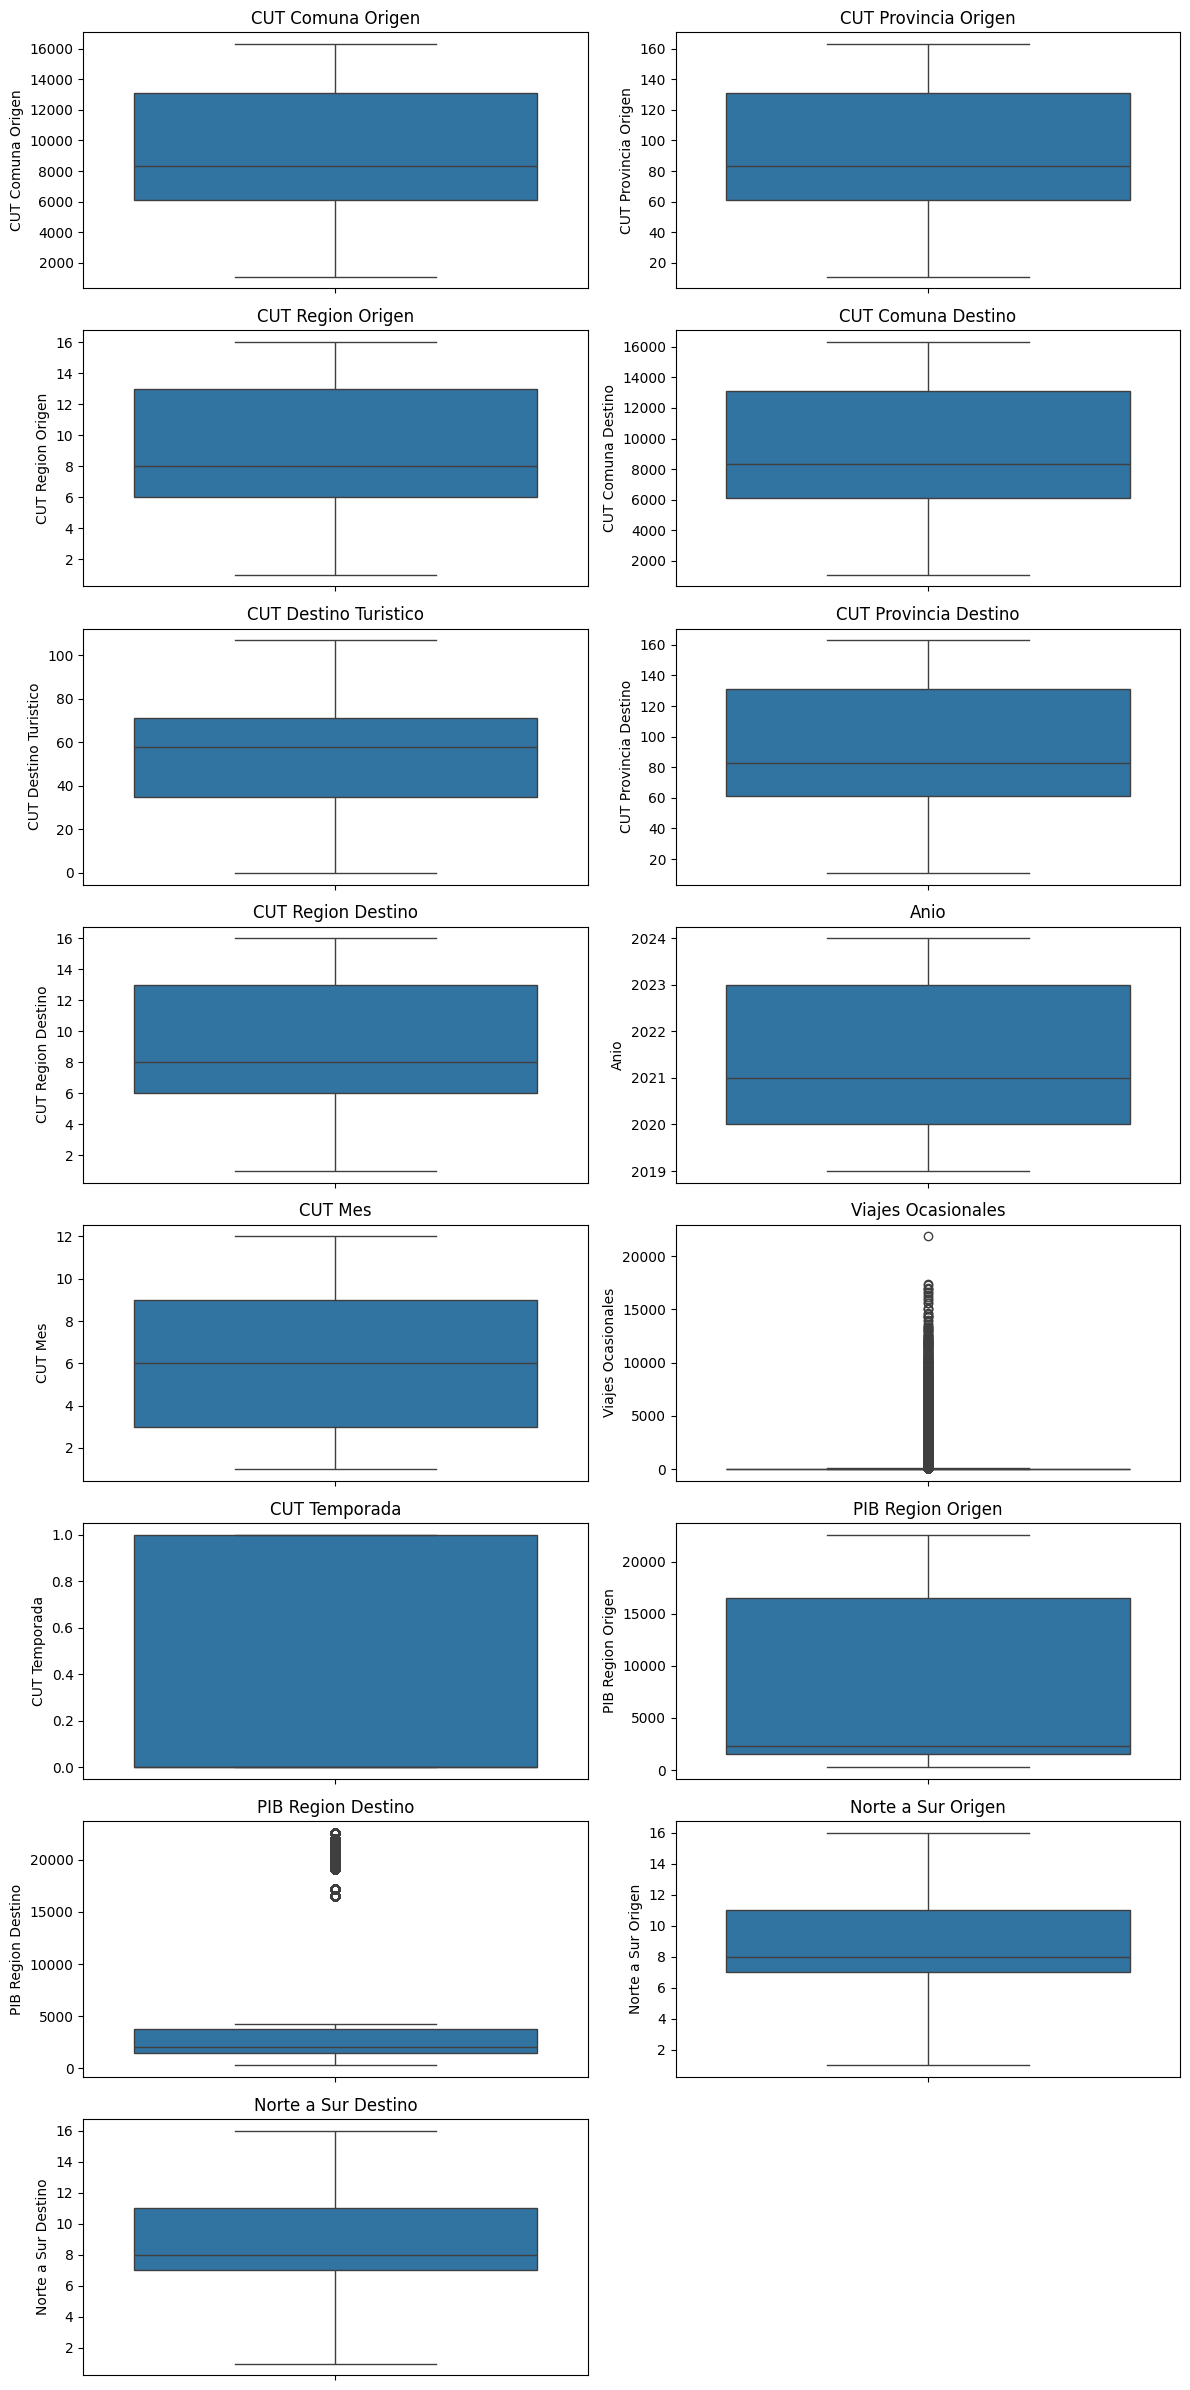

In [34]:
def plot_numerical_boxplots(df):
  
    numerical_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(numerical_cols)
    
    n_cols = 2 
    n_rows = (num_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
      sns.boxplot(y=df[col], ax=axes[i])
      axes[i].set_title(f'{col}')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_numerical_boxplots(df)

In [35]:
# Análisis Outliers en la variable 'Viajes Ocasionales'

def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'\nRango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')

print(df['Viajes Ocasionales'].describe())

col_a_analizar = 'Viajes Ocasionales'

analisis_ric(col_a_analizar,df)

print('\n',df[df[col_a_analizar]>=65].count())
print('\n',df[df[col_a_analizar]<15].count())

count    2.952624e+06
mean     5.737242e+01
std      2.221494e+02
min      1.000000e+00
25%      6.000000e+00
50%      1.300000e+01
75%      3.700000e+01
max      2.185900e+04
Name: Viajes Ocasionales, dtype: float64

Rango Intercuratílico: 31.0
Límite superior: 83.5 
Límite inferior: -40.5

 CUT Comuna Origen        471584
Comuna Origen            471584
CUT Provincia Origen     471584
Provincia Origen         471584
CUT Region Origen        471584
Region Origen            471584
CUT Comuna Destino       471584
Comuna Destino           471584
CUT Destino Turistico    471584
Destino Turistico        471584
CUT Provincia Destino    471584
Provincia Destino        471584
CUT Region Destino       471584
Region Destino           471584
Anio                     471584
CUT Mes                  471584
Mes                      471584
Viajes Ocasionales       471584
CUT Temporada            471584
Temporada                471584
PIB Region Origen        471584
PIB Region Destino       471584
No

In [43]:
df.to_csv('/Users/luiscamacho/VSCProjects/Exploracion_Proyecto_Final/data/processed/df_listo_para_segmentar.csv', sep=';', index=False)